# **Homework 5 - USA Airport Flight Analysis**

## Importing necessary libraries

In [61]:
import numpy as np 
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import functions.analysis as analysis
import functions.summarize as summarize
import zipfile

In [ ]:
!pip install kaggle

In [2]:
!kaggle datasets download flashgordon/usa-airport-dataset

Dataset URL: https://www.kaggle.com/datasets/flashgordon/usa-airport-dataset
License(s): CC0-1.0
usa-airport-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


*Unzip the file with the dataset downloaded from Kaggle:*

In [62]:
# Unzip the file we downloaded from kaggle
zip_file_path = 'usa-airport-dataset.zip'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('.')  # Extract files to the current working directory

## 1. Flight Network Analysis (Q1)

### Basic analysis

In [63]:
# Loading dataset
df = pd.read_csv("Airports2.csv")
df

,Origin_airport,Destination_airport,Origin_city,Destination_city,Passengers,Seats,Flights,Distance,Fly_date,Origin_population,Destination_population,Org_airport_lat,Org_airport_long,Dest_airport_lat,Dest_airport_long
0,MHK,AMW,"Manhattan, KS","Ames, IA",21,30,1,254,2008-10-01,122049,86219,39.140999,-96.670799,NaN,NaN
1,EUG,RDM,"Eugene, OR","Bend, OR",41,396,22,103,1990-11-01,284093,76034,44.124599,-123.211998,44.254101,-121.150002
2,EUG,RDM,"Eugene, OR","Bend, OR",88,342,19,103,1990-12-01,284093,76034,44.124599,-123.211998,44.254101,-121.150002
3,EUG,RDM,"Eugene, OR","Bend, OR",11,72,4,103,1990-10-01,284093,76034,44.124599,-123.211998,44.254101,-121.150002
4,MFR,RDM,"Medford, OR","Bend, OR",0,18,1,156,1990-02-01,147300,76034,42.374199,-122.873001,44.254101,-121.150002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3606798,STL,TBN,"St. Louis, MO","Fort Leonard Wood, MO",281,969,51,119,2009-02-01,2828990,46457,38.748699,-90.370003,37.741600,-92.140701
3606799,STL,TBN,"St. Louis, MO","Fort Leonard Wood, MO",245,1026,54,119,2009-11-01,2828990,46457,38.748699,-90.370003,37.741600,-92.140701
3606800,STL,TBN,"St. Louis, MO","Fort Leonard Wood, MO",363,1273,67,119,2009-08-01,2828990,46457,38.748699,-90.370003,37.741600,-92.140701
3606801,CGI,TBN,"Cape Girardeau, MO","Fort Leonard Wood, MO",2,19,1,146,2009-08-01,93712,46457,37.225300,-89.570801,37.741600,-92.140701


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3606803 entries, 0 to 3606802
Data columns (total 15 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Origin_airport          object 
 1   Destination_airport     object 
 2   Origin_city             object 
 3   Destination_city        object 
 4   Passengers              int64  
 5   Seats                   int64  
 6   Flights                 int64  
 7   Distance                int64  
 8   Fly_date                object 
 9   Origin_population       int64  
 10  Destination_population  int64  
 11  Org_airport_lat         float64
 12  Org_airport_long        float64
 13  Dest_airport_lat        float64
 14  Dest_airport_long       float64
dtypes: float64(4), int64(6), object(5)
memory usage: 412.8+ MB


In [65]:
df.describe()

,Passengers,Seats,Flights,Distance,Origin_population,Destination_population,Org_airport_lat,Org_airport_long,Dest_airport_lat,Dest_airport_long
count,3.606803e+06,3.606803e+06,3.606803e+06,3.606803e+06,3.606803e+06,3.606803e+06,3.599849e+06,3.599849e+06,3.599996e+06,3.599996e+06
mean,2.688910e+03,4.048297e+03,3.722890e+01,6.973190e+02,5.871502e+06,5.897982e+06,3.775029e+01,-9.186178e+01,3.774091e+01,-9.183433e+01
std,4.347617e+03,6.200871e+03,4.961970e+01,6.044165e+02,7.858062e+06,7.906127e+06,5.765453e+00,1.653773e+01,5.736556e+00,1.647228e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.300500e+04,1.288700e+04,1.972140e+01,-1.579220e+02,1.972140e+01,-1.579220e+02
25%,1.090000e+02,1.560000e+02,2.000000e+00,2.730000e+02,1.030597e+06,1.025470e+06,3.363670e+01,-9.703800e+01,3.363670e+01,-9.703800e+01
50%,1.118000e+03,1.998000e+03,2.500000e+01,5.190000e+02,2.400193e+06,2.400193e+06,3.885210e+01,-8.775240e+01,3.885210e+01,-8.775240e+01
75%,3.503000e+03,5.370000e+03,5.500000e+01,9.270000e+02,8.613622e+06,8.635706e+06,4.173260e+01,-8.029060e+01,4.173260e+01,-8.029060e+01
max,8.959700e+04,1.470620e+05,1.128000e+03,5.095000e+03,3.813959e+07,3.813959e+07,6.483750e+01,-6.882810e+01,6.483750e+01,-6.882810e+01


In [66]:
df.isnull().sum()

Origin_airport               0
Destination_airport          0
Origin_city                  0
Destination_city             0
Passengers                   0
Seats                        0
Flights                      0
Distance                     0
Fly_date                     0
Origin_population            0
Destination_population       0
Org_airport_lat           6954
Org_airport_long          6954
Dest_airport_lat          6807
Dest_airport_long         6807
dtype: int64

In [67]:
df.duplicated().sum()

41753

In [68]:
df = df.drop_duplicates()

# made for part 2


In [100]:
data = list(zip(df["Origin_airport"], df["Destination_airport"]))

In [102]:
def create_flight_network(df):
    """
    Creates a directed graph representation of the flight network.
    Args:
        df (DataFrame): DataFrame containing Origin and Destination airport data.

    Returns:
        dict: Adjacency list representation of the flight network.
    """
    flight_network = {}
    for _, row in df.iterrows():
        origin, destination = row['Origin_airport'], row['Destination_airport']
        if origin not in flight_network:
            flight_network[origin] = []
        flight_network[origin].append(destination)
        if destination not in flight_network:
            flight_network[destination] = []  # Ensure all nodes are represented
    return flight_network

#### 2. Closeness Centrality

The closeness centrality of a node is based on the inverse sum of shortest paths from that node to all other nodes.

Algorithm:
	•	Use BFS or Dijkstra’s algorithm to calculate the shortest path distances.
	•	Compute the closeness centrality as:

C(u) = $frac{N-1}{\sum_{v \neq u} d(u, v)}$

where  N  is the total number of nodes and  d(u, v)  is the shortest distance between  u  and  v .

In [103]:
from collections import deque

def closeness_centrality(flight_network, airport):
    """
    Computes the closeness centrality for a given airport.
    Args:
        flight_network (dict): Adjacency list representation of the flight network.
        airport (str): The airport to compute closeness centrality for.

    Returns:
        float: Closeness centrality score.
    """
    def bfs_shortest_path_lengths(start_node):
        distances = {node: float('inf') for node in flight_network}
        distances[start_node] = 0
        queue = deque([start_node])
        
        while queue:
            current = queue.popleft()
            for neighbor in flight_network[current]:
                if distances[neighbor] == float('inf'):  # Not visited
                    distances[neighbor] = distances[current] + 1
                    queue.append(neighbor)
        return distances
    
    distances = bfs_shortest_path_lengths(airport)
    total_distance = sum(d for d in distances.values() if d != float('inf'))
    if total_distance > 0:
        return (len(flight_network) - 1) / total_distance
    return 0

3. Betweenness Centrality

Betweenness centrality measures how often a node appears on the shortest paths between other nodes.

Algorithm:
	•	For each node  s :
	•	Compute the shortest paths to all other nodes using BFS or Dijkstra.
	•	Count how many paths pass through the node of interest.
	•	Use the formula:

$$BC(v) = sum_{s \neq v \neq t} \frac{\sigma_{st}(v)}{\sigma_{st}}$$

where:
-	 $sigma_{st}$ s the number of shortest paths from  s  to  t .
-	 $sigma_{st}(v) $ is the number of such paths passing through  v .

In [104]:
def betweenness_centrality(flight_network, airport):
    """
    Computes the betweenness centrality for a given airport.
    Args:
        flight_network (dict): Adjacency list representation of the flight network.
        airport (str): The airport to compute betweenness centrality for.

    Returns:
        float: Betweenness centrality score.
    """
    def bfs_shortest_paths(source):
        # BFS to find shortest paths from source
        distances = {node: float('inf') for node in flight_network}
        paths = {node: 0 for node in flight_network}
        distances[source] = 0
        paths[source] = 1
        queue = deque([source])
        
        while queue:
            current = queue.popleft()
            for neighbor in flight_network[current]:
                if distances[neighbor] == float('inf'):  # First visit
                    distances[neighbor] = distances[current] + 1
                    queue.append(neighbor)
                if distances[neighbor] == distances[current] + 1:  # Shortest path
                    paths[neighbor] += paths[current]
        return distances, paths
    
    betweenness = 0
    for source in flight_network:
        distances, paths = bfs_shortest_paths(source)
        dependency = {node: 0 for node in flight_network}
        sorted_nodes = sorted(flight_network.keys(), key=lambda x: -distances[x])  # Process in reverse order
        
        for node in sorted_nodes:
            for neighbor in flight_network[node]:
                if distances[neighbor] == distances[node] + 1:
                    dependency[node] += (paths[node] / paths[neighbor]) * (1 + dependency[neighbor])
            if node != source and node == airport:
                betweenness += dependency[node]
    return betweenness

In [105]:
def analyze_centrality(flight_network, airport):
    """
    Analyzes centrality measures for a given airport.
    Args:
        flight_network (dict): Adjacency list representation of the flight network.
        airport (str): The airport to analyze.

    Returns:
        dict: Dictionary of centrality measures.
    """
    return {
        "closeness_centrality": closeness_centrality(flight_network, airport),
        "betweenness_centrality": betweenness_centrality(flight_network, airport),
    }

# Example Usage
import pandas as pd

# Replace with actual dataset
df = df
flight_network = create_flight_network(df)
airport = "ATL"  # Replace with the desired airport
centrality_measures = analyze_centrality(flight_network, airport)
print(f"Centrality Measures for {airport}:")
print(centrality_measures)

ZeroDivisionError: division by zero

### another implementation :: 




In [106]:
def build_directed_graph(df):
    """
    Build a directed graph (adjacency list) from a DataFrame of flights.
    """
    graph = {}
    
    for _, row in df.iterrows():
        origin = row["Origin_airport"]
        dest = row["Destination_airport"]

        # Ensure origin in graph
        if origin not in graph:
            graph[origin] = []
        # Add edge origin -> dest
        graph[origin].append(dest)

        # Also ensure dest is in graph (even if it has no outgoing edges)
        if dest not in graph:
            graph[dest] = []
    
    return graph


In [109]:
def compute_degree_centrality(graph, airport):
    """
    Degree centrality = in_degree + out_degree
    in_degree: how many edges come INTO `airport`
    out_degree: how many edges go OUT from `airport`
    """
    # out-degree:
    out_degree = len(graph[airport]) if airport in graph else 0
    
    # in-degree: we need to count how many lists contain `airport`
    in_degree = 0
    for node, neighbors in graph.items():
        if airport in neighbors:
            in_degree += neighbors.count(airport)

    return in_degree + out_degree


In [110]:
from collections import deque

def bfs_shortest_paths(graph, start):
    """
    Returns a dict of shortest distances from `start` to every reachable node
    in an unweighted directed graph using BFS.
    dist[node] = minimum number of edges from start to node (or inf if unreachable).
    """
    dist = {node: float('inf') for node in graph}
    dist[start] = 0

    queue = deque([start])
    while queue:
        current = queue.popleft()
        for neighbor in graph[current]:
            if dist[neighbor] == float('inf'):  # not visited
                dist[neighbor] = dist[current] + 1
                queue.append(neighbor)
    
    return dist


In [111]:
def compute_closeness_centrality(graph, airport):
    """
    Closeness centrality for a single node = (# reachable nodes) / (sum of distances)
    """
    dist_dict = bfs_shortest_paths(graph, airport)
    # Exclude the node itself and any unreachable (dist=inf)
    reachable_distances = [d for node, d in dist_dict.items() 
                           if node != airport and d < float('inf')]

    if len(reachable_distances) == 0:
        return 0.0  # no reachable nodes => closeness = 0

    sum_of_distances = sum(reachable_distances)
    num_reachable = len(reachable_distances)
    closeness = num_reachable / sum_of_distances
    return closeness


In [112]:
def brandes_betweenness_centrality(graph):
    """
    Computes betweenness centrality for *all* nodes in the graph using Brandes’ Algorithm.
    Returns a dict: {node: betweenness_centrality_value}
    """
    from collections import deque
    
    Cb = {v: 0.0 for v in graph}  # betweenness scores
    nodes = list(graph.keys())
    
    for s in nodes:
        # Step 1: BFS to find shortest paths from s
        S = []
        P = {w: [] for w in graph}     # predecessors
        gdist = {w: -1 for w in graph} # distance from s
        sigma = {w: 0 for w in graph}  # # of shortest paths s->w
        
        gdist[s] = 0
        sigma[s] = 1
        
        queue = deque([s])
        while queue:
            v = queue.popleft()
            S.append(v)
            for w in graph[v]:
                # w not yet visited
                if gdist[w] < 0:
                    gdist[w] = gdist[v] + 1
                    queue.append(w)
                # Is edge (v->w) on a shortest path from s?
                if gdist[w] == gdist[v] + 1:
                    sigma[w] += sigma[v]
                    P[w].append(v)
        
        # Step 2: Back-propagation of dependencies
        delta = {w: 0 for w in graph}
        while S:
            w = S.pop()
            for v in P[w]:
                delta[v] += (sigma[v]/sigma[w]) * (1 + delta[w])
            if w != s:
                Cb[w] += delta[w]
    
    return Cb

def compute_betweenness_centrality_for_node(graph, airport):
    """
    Computes betweenness centrality for a single airport by computing it for all,
    then extracting the one we care about.
    """
    betweenness_scores = brandes_betweenness_centrality(graph)
    return betweenness_scores.get(airport, 0.0)


In [113]:
def compute_pagerank(graph, alpha=0.85, max_iter=100, tol=1.0e-6):
    """
    Returns a dict of PageRank values for each node in `graph`.
    No weights, purely unweighted edges, using a standard iterative approach.
    """
    # Initialize
    nodes = list(graph.keys())
    N = len(nodes)
    
    # Initialize rank uniformly
    rank = {node: 1.0 / N for node in nodes}
    
    # Precompute out-degree
    out_degree = {}
    for node in nodes:
        out_degree[node] = len(graph[node])
    
    for iteration in range(max_iter):
        new_rank = {}
        # Start with base portion (1 - alpha)/N
        base = (1 - alpha) / N
        
        for node in nodes:
            new_rank[node] = base
        
        # Distribute PageRank from each node u to its neighbors
        for u in nodes:
            # If no out-links, in a naive version we might do "rank[u]" in a random jump
            # but let's keep it simple and just distribute if out_degree[u] > 0
            if out_degree[u] > 0:
                contribution = alpha * (rank[u] / out_degree[u])
                for v in graph[u]:
                    new_rank[v] += contribution
            else:
                # If a node has no out_links, it can be considered a "sink". 
                # A common approach is to distribute its entire rank among all nodes. 
                # We'll do that here to avoid rank sink.
                contribution = alpha * (rank[u] / N)
                for v in nodes:
                    new_rank[v] += contribution
        
        # Check convergence
        diff = sum(abs(new_rank[node] - rank[node]) for node in nodes)
        rank = new_rank
        if diff < tol:
            break
    
    return rank

def compute_pagerank_for_node(graph, airport, alpha=0.85, max_iter=100, tol=1.0e-6):
    """
    Computes PageRank for the entire graph, then returns the score for a single airport.
    """
    pr_scores = compute_pagerank(graph, alpha=alpha, max_iter=max_iter, tol=tol)
    return pr_scores.get(airport, 0.0)


In [114]:
def analyze_centrality(df, airport):
    """
    Given a DataFrame (df) and an airport code,
    build the directed flight graph from scratch (no NetworkX),
    and compute four measures for that airport:
        1. Degree Centrality
        2. Closeness Centrality
        3. Betweenness Centrality
        4. PageRank
    Returns a dictionary with these four measures.
    """
    # 1) Build the Graph
    graph = build_directed_graph(df)

    # 2) Degree Centrality
    degree_centrality = compute_degree_centrality(graph, airport)

    # 3) Closeness Centrality
    closeness_centrality = compute_closeness_centrality(graph, airport)

    # 4) Betweenness Centrality
    betweenness_centrality = compute_betweenness_centrality_for_node(graph, airport)

    # 5) PageRank
    pagerank_score = compute_pagerank_for_node(graph, airport)

    return {
        "airport": airport,
        "degree_centrality": degree_centrality,
        "closeness_centrality": closeness_centrality,
        "betweenness_centrality": betweenness_centrality,
        "pagerank": pagerank_score
    }


In [115]:
# Suppose you have your DataFrame `df` with columns:
#   Origin_airport, Destination_airport, ...
result = analyze_centrality(df, "DFW")
print(result)

# Possible output:
# {
#   'airport': 'DFW',
#   'degree_centrality': 123,         # in-degree + out-degree
#   'closeness_centrality': 0.0123,
#   'betweenness_centrality': 45.6,
#   'pagerank': 0.00123
# }

{'airport': 'DFW', 'degree_centrality': 216929, 'closeness_centrality': 0.6068669527896996, 'betweenness_centrality': 25411.545110947445, 'pagerank': 0.02723825716177504}


In [116]:
# Suppose you have your DataFrame `df` with columns:
#   Origin_airport, Destination_airport, ...
result = analyze_centrality(df, "FVS")
print(result)

# Possible output:
# {
#   'airport': 'DFW',
#   'degree_centrality': 123,         # in-degree + out-degree
#   'closeness_centrality': 0.0123,
#   'betweenness_centrality': 45.6,
#   'pagerank': 0.00123
# }


{'airport': 'FVS', 'degree_centrality': 6, 'closeness_centrality': 1.0, 'betweenness_centrality': 0.0, 'pagerank': 0.00021885955344669127}


### another approach :: 

In [117]:
def build_directed_graph(df):
    graph = {}
    
    for _, row in df.iterrows():
        origin = row["Origin_airport"]
        dest = row["Destination_airport"]
        
        if origin not in graph:
            graph[origin] = []
        graph[origin].append(dest)
        
        if dest not in graph:
            graph[dest] = []
    
    return graph


In [118]:
def compute_all_degree_centralities(graph):
    in_degree = {node: 0 for node in graph}
    out_degree = {node: len(adj) for node, adj in graph.items()}  # out_degree is the  lenght of the adiacent list 
    
    for u in graph:
        for v in graph[u]:
            in_degree[v] += 1
    
    degree_centrality = {}
    for node in graph:
        degree_centrality[node] = in_degree[node] + out_degree[node]
    
    return degree_centrality


In [119]:
from collections import deque
import math

def compute_all_closeness_centralities(graph):
    nodes = list(graph.keys())
    closeness = {}
    
    for start in nodes:
        # BFS distanze
        dist = {n: math.inf for n in nodes}
        dist[start] = 0
        
        queue = deque([start])
        while queue:
            curr = queue.popleft()
            for w in graph[curr]:
                if dist[w] == math.inf:
                    dist[w] = dist[curr] + 1
                    queue.append(w)

        # Somma delle distanze e conteggio nodi raggiunti
        reachable_distances = [d for d in dist.values() if d < math.inf and d != 0]
        if len(reachable_distances) == 0:
            closeness[start] = 0.0
        else:
            sum_dist = sum(reachable_distances)
            num_reachable = len(reachable_distances)
            closeness[start] = num_reachable / sum_dist
    
    return closeness


In [120]:
def brandes_betweenness_centrality(graph):
    from collections import deque
    
    Cb = {v: 0.0 for v in graph}
    nodes = list(graph.keys())
    
    for s in nodes:
        # 1) BFS per trovare distanze e sigma (# percorsi minimi)
        S = []
        P = {w: [] for w in graph}  # predecessori
        dist = {w: -1 for w in graph}
        sigma = {w: 0 for w in graph}
        
        dist[s] = 0
        sigma[s] = 1
        
        queue = deque([s])
        while queue:
            v = queue.popleft()
            S.append(v)
            for w in graph[v]:
                if dist[w] < 0:   # w non visitato
                    dist[w] = dist[v] + 1
                    queue.append(w)
                if dist[w] == dist[v] + 1:  # percorso minimo
                    sigma[w] += sigma[v]
                    P[w].append(v)
        
        # 2) Back-propagation
        delta = {w: 0 for w in graph}
        while S:
            w = S.pop()
            for v in P[w]:
                delta[v] += (sigma[v]/sigma[w]) * (1 + delta[w])
            if w != s:
                Cb[w] += delta[w]
    
    return Cb


In [121]:
import random

def brandes_betweenness_approx(graph, sample_fraction=0.1):
    """
    Approssima la betweenness calcolando Brandes solo su
    una frazione dei nodi presi a campione come sorgenti.
    """
    from collections import deque
    
    Cb = {v: 0.0 for v in graph}
    nodes = list(graph.keys())
    sample_size = max(1, int(len(nodes)*sample_fraction))
    sample_nodes = random.sample(nodes, sample_size)
    
    for s in sample_nodes:
        # (stesso BFS e back-propagation di prima)
        S = []
        P = {w: [] for w in graph}
        dist = {w: -1 for w in graph}
        sigma = {w: 0 for w in graph}
        
        dist[s] = 0
        sigma[s] = 1
        
        queue = deque([s])
        while queue:
            v = queue.popleft()
            S.append(v)
            for w in graph[v]:
                if dist[w] < 0:
                    dist[w] = dist[v] + 1
                    queue.append(w)
                if dist[w] == dist[v] + 1:
                    sigma[w] += sigma[v]
                    P[w].append(v)
        
        delta = {w: 0 for w in graph}
        while S:
            w = S.pop()
            for v in P[w]:
                delta[v] += (sigma[v]/sigma[w]) * (1 + delta[w])
            if w != s:
                Cb[w] += delta[w]
    
    # Scala i risultati per "compensare" il campione
    scale = len(nodes) / sample_size
    for v in Cb:
        Cb[v] *= scale
    
    return Cb


In [122]:
def compute_pagerank(graph, alpha=0.85, max_iter=100, tol=1e-6):
    import math
    
    nodes = list(graph.keys())
    N = len(nodes)
    rank = {node: 1.0 / N for node in nodes}  # inizializzazione uniforme
    
    out_degree = {node: len(graph[node]) for node in nodes}
    
    for _ in range(max_iter):
        new_rank = {node: (1 - alpha)/N for node in nodes}  # base portion
        # Somma del rank dei "sinks" (nodi senza uscita)
        sink_sum = 0.0
        for u in nodes:
            if out_degree[u] == 0:
                sink_sum += rank[u]
        
        # Distribuzione del "sink sum" (teleport) su tutti i nodi
        sink_contribution = alpha * sink_sum / N
        
        # Per ogni u con out_degree > 0
        for u in nodes:
            if out_degree[u] > 0:
                # distribuisce (alpha * rank[u]) / out_degree[u] ai suoi vicini
                contrib = alpha * rank[u] / out_degree[u]
                for v in graph[u]:
                    new_rank[v] += contrib
            else:
                # se è sink, lo abbiamo già conteggiato in sink_sum
                pass
        
        # Aggiungiamo il contributo dei sink a tutti i nodi
        for v in nodes:
            new_rank[v] += sink_contribution
        
        # Check se convergiamo
        diff = sum(abs(new_rank[n] - rank[n]) for n in nodes)
        rank = new_rank
        if diff < tol:
            break
    
    return rank


In [123]:
import matplotlib.pyplot as plt
import numpy as np

def compare_centralities(df, approximate_betweenness=False, sample_fraction=0.1):
    """
    Calcola e confronta Degree, Closeness, Betweenness, PageRank per TUTTI i nodi.
    - approximate_betweenness: se True, usa Brandes su un sottoinsieme di nodi per ridurre il tempo.
    - sample_fraction: percentuale di nodi usati per il calcolo approssimato della Betweenness.
    
    Ritorna un dizionario con i top-5 nodi per ognuna delle 4 metriche.
    Inoltre plotta gli istogrammi delle distribuzioni.
    """
    # 1) Costruiamo il grafo
    graph = build_directed_graph(df)
    nodes = list(graph.keys())
    
    # 2) Degree
    degree_dict = compute_all_degree_centralities(graph)
    
    # 3) Closeness
    closeness_dict = compute_all_closeness_centralities(graph)
    
    # 4) Betweenness (con Brandes) o Betweenness approx
    if approximate_betweenness:
        betweenness_dict = brandes_betweenness_approx(graph, sample_fraction=sample_fraction)
    else:
        betweenness_dict = brandes_betweenness_centrality(graph)
    
    # 5) PageRank
    pagerank_dict = compute_pagerank(graph, alpha=0.85, max_iter=100, tol=1e-6)
    
    # Convertiamo i risultati in liste per plottare (degree, closeness, etc.)
    degree_vals = [degree_dict[n] for n in nodes]
    closeness_vals = [closeness_dict[n] for n in nodes]
    betweenness_vals = [betweenness_dict[n] for n in nodes]
    pagerank_vals = [pagerank_dict[n] for n in nodes]
    
    # -- Plot Histograms --
    plt.figure(figsize=(12,8))
    plt.subplot(2,2,1)
    plt.hist(degree_vals, bins=30, color='skyblue', edgecolor='black')
    plt.title("Degree Centrality Distribution")
    
    plt.subplot(2,2,2)
    plt.hist(closeness_vals, bins=30, color='orange', edgecolor='black')
    plt.title("Closeness Centrality Distribution")
    
    plt.subplot(2,2,3)
    plt.hist(betweenness_vals, bins=30, color='green', edgecolor='black')
    plt.title("Betweenness Centrality Distribution")
    
    plt.subplot(2,2,4)
    plt.hist(pagerank_vals, bins=30, color='purple', edgecolor='black')
    plt.title("PageRank Distribution")
    
    plt.tight_layout()
    plt.show()
    
    # -- Top 5 per ciascuna metrica --
    # ordiniamo i nodi per valore desc e prendiamo i primi 5
    def top_5(dictionary):
        return sorted(dictionary.items(), key=lambda x: x[1], reverse=True)[:5]
    
    top_degree = top_5(degree_dict)
    top_closeness = top_5(closeness_dict)
    top_betweenness = top_5(betweenness_dict)
    top_pagerank = top_5(pagerank_dict)
    
    result = {
        "top_degree": top_degree,
        "top_closeness": top_closeness,
        "top_betweenness": top_betweenness,
        "top_pagerank": top_pagerank
    }
    
    return result


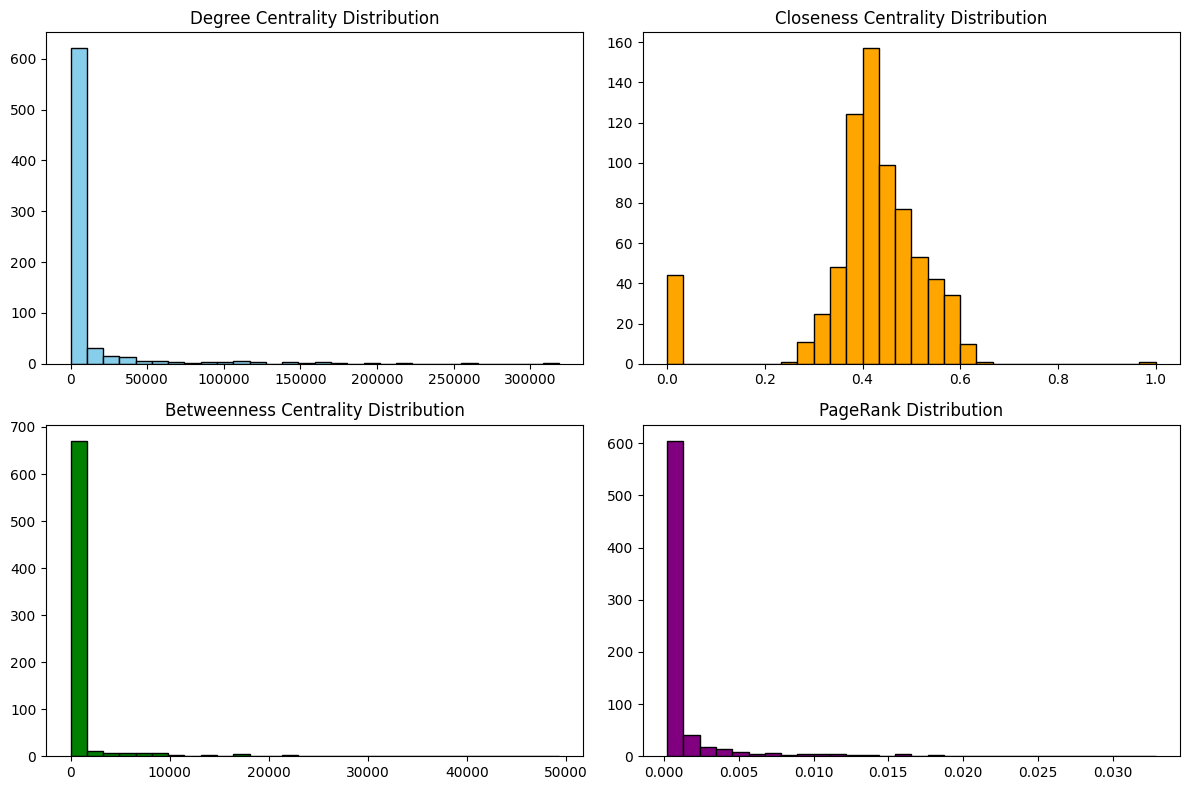

Top 5 (Degree): [('ORD', 318550), ('ATL', 263825), ('DFW', 216929), ('DTW', 198972), ('MSP', 197492)]
Top 5 (Closeness): [('FVS', 1.0), ('YIP', 0.643312101910828), ('MSP', 0.6229074889867842), ('MEM', 0.6190893169877408), ('ORD', 0.6185476815398075)]
Top 5 (Betweenness): [('YIP', 49275.026530562456), ('ABQ', 36930.85112363405), ('STL', 35698.50322309454), ('MSP', 29927.03124965118), ('DFW', 26921.119604381885)]
Top 5 (PageRank): [('ORD', 0.03286036308026748), ('ATL', 0.028808158606185928), ('DFW', 0.02723825716177506), ('MSP', 0.024314070868441773), ('DTW', 0.020417520126628574)]


In [124]:
# Esempio d’uso:
res = compare_centralities(df, approximate_betweenness=True, sample_fraction=0.05)
print("Top 5 (Degree):", res["top_degree"])
print("Top 5 (Closeness):", res["top_closeness"])
print("Top 5 (Betweenness):", res["top_betweenness"])
print("Top 5 (PageRank):", res["top_pagerank"])

### 1.1 Computing function

In [94]:
# Creating the flight network graph
flight_network = nx.DiGraph()
for _, row in df.iterrows():
    flight_network.add_edge(row['Origin_airport'], row['Destination_airport'])

In [98]:
display(len(flight_network))

727

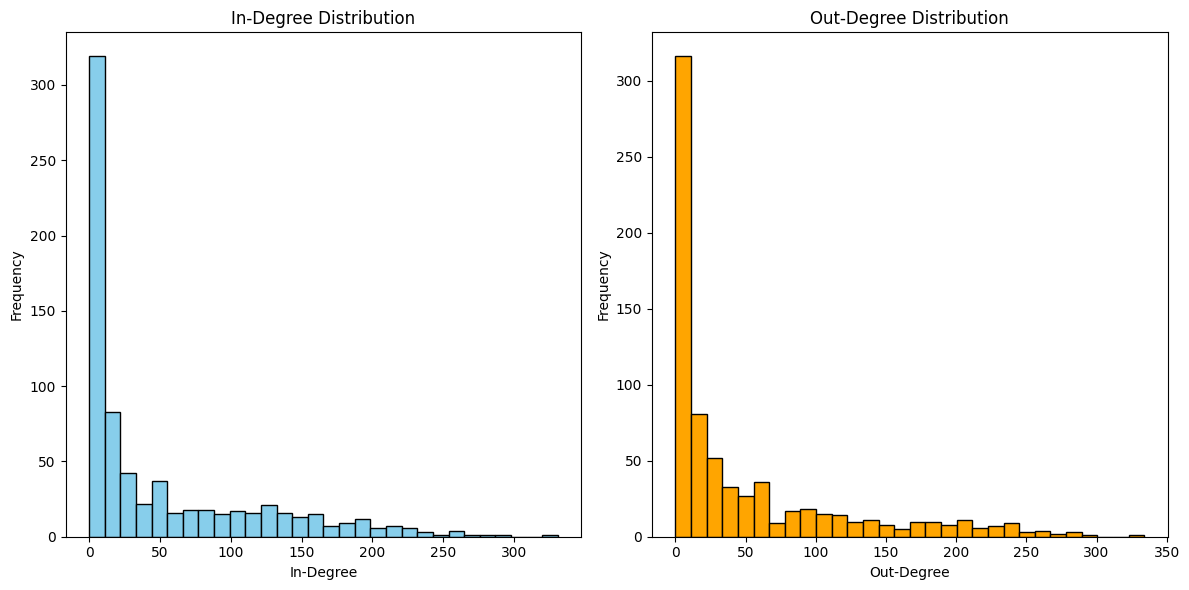

{'num_nodes': 727,
 'num_edges': 36719,
 'density': 0.1391392984490396,
 'in_degree': {'MHK': 96,
  'AMW': 1,
  'EUG': 78,
  'RDM': 54,
  'MFR': 52,
  'SEA': 188,
  'PDX': 158,
  'LMT': 22,
  'SFO': 164,
  'LAX': 207,
  'EAT': 18,
  'YKM': 68,
  'EKO': 150,
  'SLE': 17,
  'GEG': 126,
  'RDD': 49,
  'LWS': 55,
  'AST': 3,
  'CLM': 13,
  'PDT': 15,
  'SJC': 146,
  'ACV': 23,
  'PUW': 48,
  'SMF': 116,
  'FLL': 181,
  'PHX': 225,
  'BFI': 141,
  'GGG': 108,
  'GTF': 89,
  'FAT': 111,
  'TUS': 212,
  'MWH': 56,
  'BIL': 109,
  'DFW': 251,
  'RBG': 5,
  'SLC': 219,
  'CPR': 79,
  'RNO': 159,
  'FBK': 14,
  'ANC': 114,
  'BIF': 79,
  'CIC': 11,
  'SAF': 23,
  'ABQ': 181,
  'FSM': 107,
  'LAS': 227,
  'DQF': 53,
  'ICT': 189,
  'AZA': 74,
  'DLH': 111,
  'CEC': 13,
  'OKC': 241,
  'SAN': 143,
  'STS': 17,
  'DRO': 33,
  'OAK': 173,
  'IAH': 217,
  'ELP': 198,
  'DBQ': 41,
  'HLN': 54,
  'TUL': 186,
  'OMA': 186,
  'ACT': 151,
  'BTM': 20,
  'AUS': 178,
  'PIA': 164,
  'CWA': 80,
  'PUB': 123,

In [95]:
analysis.analyse_graph_features(flight_network)

In [71]:
print(flight_network)

DiGraph with 727 nodes and 36719 edges


## for part 2 :: 

### 1.2 Summarizing function

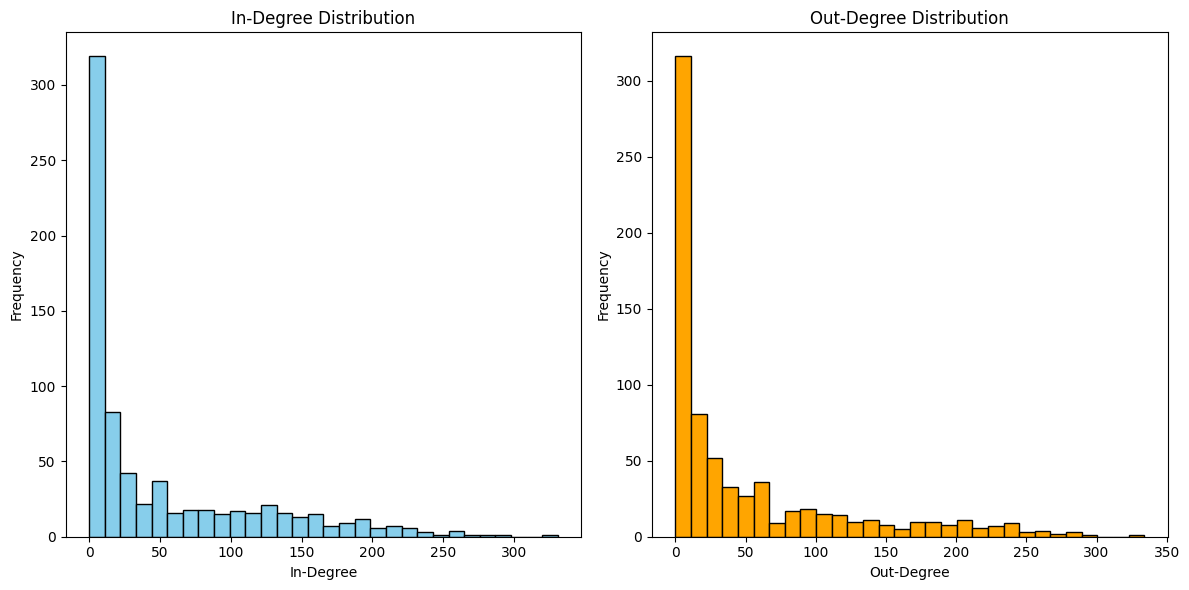

Graph Summary Report:
Number of airports (nodes): 727
Number of flights (edges): 36719
Graph Density: 0.1391
Graph Type: Dense

Identified Hubs (Airports with high degree):
   Node  In-Degree  Out-Degree  Total Degree
0   SAN        143         196           339
1   ELP        198         223           421
2   CMH        198         206           404
3   MCO        195         223           418
4   PHL        199         230           429
..  ...        ...         ...           ...
73  IND        255         258           513
74  SYR        160         154           314
75  LAX        207         243           450
76  BHM        180         175           355
77  OMA        186         208           394

[78 rows x 4 columns]


In [13]:
summarize.summarize_graph_features(flight_network)

### 1.3 Deeper analysis

In [14]:
total_passengers = (df.groupby(['Origin_city', 'Destination_city'])['Passengers'].sum()
                    .reset_index().rename(columns={"Passengers": "Total_passengers"}))
total_passengers_df = total_passengers[['Origin_city', 'Destination_city', 'Total_passengers']]

In [15]:
total_passengers_df

,Origin_city,Destination_city,Total_passengers
0,"Aberdeen, SD","Anchorage, AK",2
1,"Aberdeen, SD","Billings, MT",100
2,"Aberdeen, SD","Bismarck, ND",67
3,"Aberdeen, SD","Brainerd, MN",32
4,"Aberdeen, SD","Eau Claire, WI",32
...,...,...,...
30326,"Yuma, AZ","Yuma, AZ",0
30327,"Zanesville, OH","Atlanta, GA",0
30328,"Zanesville, OH","Detroit, MI",0
30329,"Zanesville, OH","Kansas City, MO",0


In [17]:
# Sorting to find busiest routes by passengers flow
busiest_routes = total_passengers.sort_values(by='Total_passengers', ascending=False)
busiest_routes = busiest_routes.head(20)

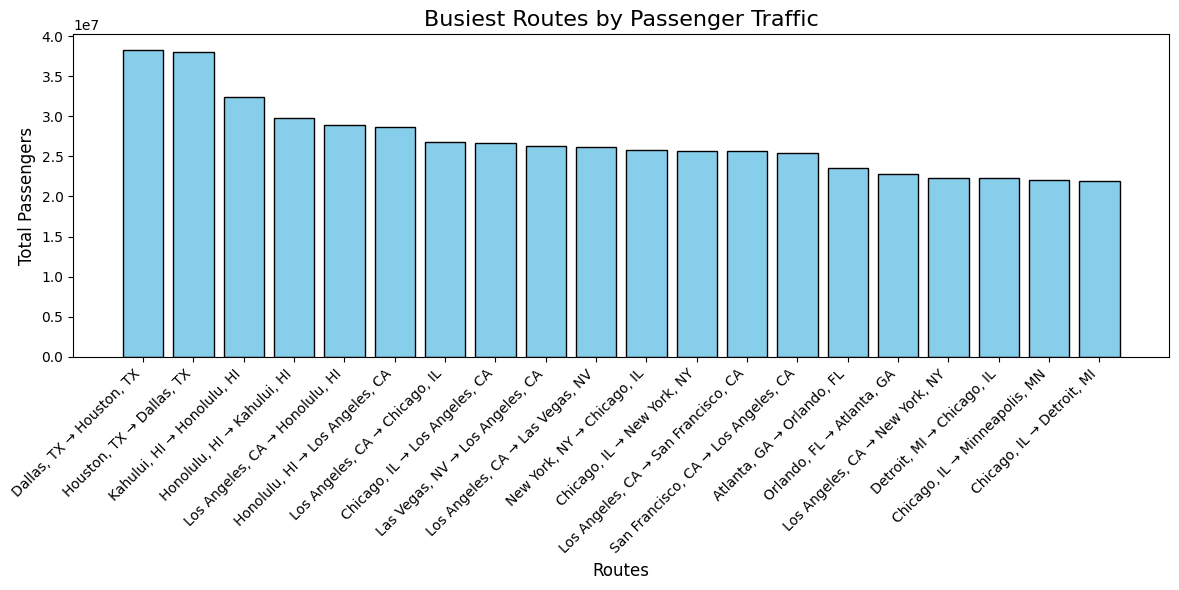

In [ ]:
# Visualise the results
plt.figure(figsize=(12, 6))
plt.bar(
    busiest_routes["Origin_city"] + " → " + busiest_routes["Destination_city"],
    busiest_routes["Total_passengers"],
    color="skyblue",
    edgecolor="black"
)

plt.title("Busiest Routes by Passenger Traffic", fontsize=16)
plt.xlabel("Routes", fontsize=12)
plt.ylabel("Total Passengers", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.tight_layout()
plt.show()

In [16]:
# Calculate the average passengers per flight for each route and highlight under/over-utilized connections.

# Add Total_flights column
total_flights_df = (
    df.groupby(["Origin_city", "Destination_city"])["Flights"]
    .sum()
    .reset_index()
    .rename(columns={"Flights": "Total_flights"})
)
total_flights_df = total_flights_df[['Origin_city', 'Destination_city', 'Total_flights']]

# Merge the two DataFrames
route_stats = pd.merge(total_passengers_df, total_flights_df, on=["Origin_city", "Destination_city"])

# Avoid division by 0 and null values and calculate the average passengers per flight
route_stats["Avg_pass_per_flight"] = np.where(
    (route_stats["Total_flights"] > 0) & (route_stats['Total_passengers'] > 0),
    (route_stats["Total_passengers"] / route_stats["Total_flights"]),
    0  
)

# Display the results
route_stats


,Origin_city,Destination_city,Total_passengers,Total_flights,Avg_pass_per_flight
0,"Aberdeen, SD","Anchorage, AK",2,1,2.0
1,"Aberdeen, SD","Billings, MT",100,1,100.0
2,"Aberdeen, SD","Bismarck, ND",67,2,33.5
3,"Aberdeen, SD","Brainerd, MN",32,1,32.0
4,"Aberdeen, SD","Eau Claire, WI",32,1,32.0
...,...,...,...,...,...
30326,"Yuma, AZ","Yuma, AZ",0,2,0.0
30327,"Zanesville, OH","Atlanta, GA",0,5,0.0
30328,"Zanesville, OH","Detroit, MI",0,3,0.0
30329,"Zanesville, OH","Kansas City, MO",0,1,0.0


In [17]:
# Define thresholds for under-utilized and over-utilized connections
under_utilized_threshold = route_stats["Avg_pass_per_flight"].quantile(0.3)
over_utilized_threshold = route_stats["Avg_pass_per_flight"].quantile(0.7)

# Highlight under-utilized and over-utilized connections
route_stats["Utilization"] = pd.cut(
    route_stats["Avg_pass_per_flight"],
    bins=[-float("inf"), under_utilized_threshold, over_utilized_threshold, float("inf")],
    labels=["Under-Utilized", "Moderately Utilized", "Over-Utilized"]
)
route_stats

,Origin_city,Destination_city,Total_passengers,Total_flights,Avg_pass_per_flight,Utilization
0,"Aberdeen, SD","Anchorage, AK",2,1,2.0,Under-Utilized
1,"Aberdeen, SD","Billings, MT",100,1,100.0,Over-Utilized
2,"Aberdeen, SD","Bismarck, ND",67,2,33.5,Moderately Utilized
3,"Aberdeen, SD","Brainerd, MN",32,1,32.0,Moderately Utilized
4,"Aberdeen, SD","Eau Claire, WI",32,1,32.0,Moderately Utilized
...,...,...,...,...,...,...
30326,"Yuma, AZ","Yuma, AZ",0,2,0.0,Under-Utilized
30327,"Zanesville, OH","Atlanta, GA",0,5,0.0,Under-Utilized
30328,"Zanesville, OH","Detroit, MI",0,3,0.0,Under-Utilized
30329,"Zanesville, OH","Kansas City, MO",0,1,0.0,Under-Utilized


In [ ]:
### Missing geomap

### 1.4 Report

### 1.5 Questions to address

## **2. Nodes' Contribution (Q2)**

*In any network, certain nodes (airports, in this case) play a critical role in maintaining connectivity and flow. Centrality measures are used to identify these nodes.*

**Your Task:**
Implement a function analyze_centrality(flight_network, airport) that computes the following centrality measures for a given airport:

- Betweenness centrality: Measures how often a node appears on the shortest paths between other nodes.
- Closeness centrality: Measures how easily a node can access all other nodes in the network.
- Degree centrality: Simply counts the number of direct connections to the node.
- PageRank: Computes the "importance" of a node based on incoming connections and their weights.

Write a function compare_centralities(flight_network) to:

- Compute and compare centrality values for all nodes in the graph.
- Plot centrality distributions (histograms for each centrality measure).
- Return the top 5 airports for each centrality measure.
- Ask LLM (eg. ChatGPT) to suggest alternative centrality measures that might be relevant to this task. How can you check that the results given by the LLM are trustable?

Implement one of these measures suggested by the LLM, compare its results to the centralities you've already computed, and analyze whether it adds any new insights.

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict, deque

def build_directed_graph(df):
    """
    Crea un grafo diretto come adjacency list da un DataFrame di voli.
    Usa le colonne: 'Origin_airport', 'Destination_airport'.
    Ritorna un dict: {airport: [lista di aeroporti raggiungibili con un volo]}
    """
    graph = defaultdict(list)
    
    for _, row in df.iterrows():
        origin = row["Origin_airport"]
        dest = row["Destination_airport"]
        
        # Evita di aggiungere self-loop (se ci fossero)
        if origin != dest:
            graph[origin].append(dest)
        
        # Assicuriamo che anche il nodo destinazione esista nel grafo
        if dest not in graph:
            graph[dest] = []
    
    # Convert da defaultdict(list) a un dict "normale" se preferisci
    return dict(graph)


In [126]:
def compute_degree_centrality(graph, airport):
    """
    Degree = in_degree + out_degree
    in_degree: quante rotte entrano nell'aeroporto
    out_degree: quante rotte escono dall'aeroporto
    """
    if airport not in graph:
        return 0
    
    # out-degree = lunghezza della lista di adiacenza
    out_deg = len(graph[airport])
    
    # in-degree = conta quante volte 'airport' compare nelle liste di adiacenza di altri nodi
    in_deg = 0
    for node, neighbors in graph.items():
        in_deg += neighbors.count(airport)
    
    return in_deg + out_deg


In [127]:
def bfs_shortest_paths(graph, start):
    """
    Restituisce un dizionario distanze: dist[node] = distanza minima (in archi) da `start` a `node`.
    Se un nodo non è raggiungibile, dist[node] rimane inf.
    """
    dist = {node: float('inf') for node in graph}
    dist[start] = 0
    queue = deque([start])
    
    while queue:
        current = queue.popleft()
        for neighbor in graph[current]:
            if dist[neighbor] == float('inf'):
                dist[neighbor] = dist[current] + 1
                queue.append(neighbor)
    
    return dist

def compute_closeness_centrality(graph, airport):
    """
    Closeness(airport) = (# nodi raggiunti) / (somma distanze)
    """
    if airport not in graph:
        return 0.0
    
    dist_dict = bfs_shortest_paths(graph, airport)
    # Escludiamo la distanza a se stesso (0) e gli inf
    valid_distances = [d for node, d in dist_dict.items() if node != airport and d < float('inf')]
    
    if len(valid_distances) == 0:
        return 0.0
    
    return len(valid_distances) / sum(valid_distances)


In [128]:
def brandes_betweenness_centrality(graph):
    """
    Calcola la betweenness centrality per TUTTI i nodi del grafo (diretto).
    Restituisce un dict {nodo: valore_betweenness}.
    Complessità: O(VE) in un grafo non pesato.
    """
    # Inizializza a 0 la betweenness di tutti i nodi
    Cb = {v: 0.0 for v in graph}
    nodes = list(graph.keys())
    
    for s in nodes:
        # Step 1) BFS per distanze e numero cammini minimi (sigma)
        S = []
        P = {w: [] for w in graph}    # predecessori
        dist = {w: -1 for w in graph} # distanza da s
        sigma = {w: 0 for w in graph} # numero di cammini minimi da s a w
        
        dist[s] = 0
        sigma[s] = 1
        queue = deque([s])
        
        while queue:
            v = queue.popleft()
            S.append(v)
            for w in graph[v]:
                # primo arrivo su w
                if dist[w] < 0:
                    dist[w] = dist[v] + 1
                    queue.append(w)
                # se esiste un cammino minimo
                if dist[w] == dist[v] + 1:
                    sigma[w] += sigma[v]
                    P[w].append(v)
        
        # Step 2) Back-propagation
        delta = {w: 0 for w in graph}
        while S:
            w = S.pop()
            for v in P[w]:
                delta[v] += (sigma[v]/sigma[w]) * (1 + delta[w])
            if w != s:
                Cb[w] += delta[w]
    
    return Cb


In [129]:
def compute_betweenness_centrality_for_node(graph, airport):
    """
    Calcola la betweenness di TUTTI i nodi (Brandes) e ritorna solo quella di 'airport'.
    """
    bc_all = brandes_betweenness_centrality(graph)
    return bc_all.get(airport, 0.0)


In [130]:
def compute_pagerank(graph, alpha=0.85, max_iter=100, tol=1e-6):
    """
    Calcola il PageRank per tutti i nodi in un grafo *diretto* (unweighted).
    Restituisce {nodo: pagerank_value}.
    """
    nodes = list(graph.keys())
    N = len(nodes)
    # Inizializzazione uniforme
    rank = {n: 1.0 / N for n in nodes}
    
    # Pre-calcolo out-degree
    out_degree = {}
    for n in nodes:
        out_degree[n] = len(graph[n])
    
    for _ in range(max_iter):
        new_rank = {n: (1 - alpha) / N for n in nodes}
        
        # Somma di rank di nodi "sink" (out_degree = 0)
        sink_sum = 0.0
        for n in nodes:
            if out_degree[n] == 0:
                sink_sum += rank[n]
        
        sink_contribution = alpha * sink_sum / N
        
        for u in nodes:
            if out_degree[u] > 0:
                contrib = alpha * (rank[u] / out_degree[u])
                for v in graph[u]:
                    new_rank[v] += contrib
            else:
                # Se è sink, aggiunto in sink_sum
                pass
        
        # Aggiungo la quota di sink a tutti
        for v in nodes:
            new_rank[v] += sink_contribution
        
        # Controllo convergenza
        diff = sum(abs(new_rank[n] - rank[n]) for n in nodes)
        rank = new_rank
        if diff < tol:
            break
    
    return rank

def compute_pagerank_for_node(graph, airport, alpha=0.85, max_iter=100, tol=1e-6):
    """
    Calcola il PageRank per tutti e restituisce quello di un singolo airport.
    """
    all_pr = compute_pagerank(graph, alpha=alpha, max_iter=max_iter, tol=tol)
    return all_pr.get(airport, 0.0)


In [131]:
def analyze_centrality(df, airport):
    """
    1) Costruisce il grafo (directed) dal DataFrame df
    2) Calcola:
       - Degree (in+out)
       - Closeness
       - Betweenness
       - PageRank
    3) Ritorna un dizionario con questi valori per l'aeroporto richiesto.
    """
    graph = build_directed_graph(df)
    
    # 1) Degree
    deg = compute_degree_centrality(graph, airport)
    # 2) Closeness
    clos = compute_closeness_centrality(graph, airport)
    # 3) Betweenness (Brandes su tutto, estrai singolo)
    bet = compute_betweenness_centrality_for_node(graph, airport)
    # 4) PageRank (estrai singolo)
    pr = compute_pagerank_for_node(graph, airport)
    
    return {
        "airport": airport,
        "degree_centrality": deg,
        "closeness_centrality": clos,
        "betweenness_centrality": bet,
        "pagerank": pr
    }


In [132]:
def compute_all_degree_centralities(graph):
    degree_dict = {}
    
    # Precalcolo in_degree
    in_degree = {n: 0 for n in graph}
    for u in graph:
        for v in graph[u]:
            in_degree[v] += 1
    
    for n in graph:
        out_deg = len(graph[n])
        total_deg = in_degree[n] + out_deg
        degree_dict[n] = total_deg
    
    return degree_dict

def compute_all_closeness_centralities(graph):
    """
    BFS da ogni nodo per calcolare la closeness.
    Closeness(n) = (# raggiungibili) / (somma distanze).
    """
    closeness = {}
    nodes = list(graph.keys())
    
    for start in nodes:
        dist = {n: float('inf') for n in graph}
        dist[start] = 0
        queue = deque([start])
        
        while queue:
            curr = queue.popleft()
            for w in graph[curr]:
                if dist[w] == float('inf'):
                    dist[w] = dist[curr] + 1
                    queue.append(w)
        
        valid_dists = [d for n, d in dist.items() if n != start and d < float('inf')]
        if len(valid_dists) == 0:
            closeness[start] = 0.0
        else:
            closeness[start] = len(valid_dists) / sum(valid_dists)
    
    return closeness

def compare_centralities(df):
    """
    - Costruisce il grafo
    - Calcola degree, closeness, betweenness, pagerank per TUTTI i nodi
    - Plotta gli istogrammi
    - Ritorna top-5 di ognuna delle 4 metriche
    """
    graph = build_directed_graph(df)
    nodes = list(graph.keys())
    
    # 1) Degree
    degree_dict = compute_all_degree_centralities(graph)
    
    # 2) Closeness
    closeness_dict = compute_all_closeness_centralities(graph)
    
    # 3) Betweenness (Brandes)
    betweenness_dict = brandes_betweenness_centrality(graph)
    
    # 4) PageRank
    pr_dict = compute_pagerank(graph)
    
    # Convertiamo i risultati in liste per fare gli histogram
    degree_vals = [degree_dict[n] for n in nodes]
    closeness_vals = [closeness_dict[n] for n in nodes]
    betweenness_vals = [betweenness_dict[n] for n in nodes]
    pagerank_vals = [pr_dict[n] for n in nodes]
    
    # Istogrammi
    plt.figure(figsize=(12,8))
    
    plt.subplot(2,2,1)
    plt.hist(degree_vals, bins=30, color='skyblue', edgecolor='black')
    plt.title("Degree Centrality Distribution")
    
    plt.subplot(2,2,2)
    plt.hist(closeness_vals, bins=30, color='orange', edgecolor='black')
    plt.title("Closeness Centrality Distribution")
    
    plt.subplot(2,2,3)
    plt.hist(betweenness_vals, bins=30, color='green', edgecolor='black')
    plt.title("Betweenness Centrality Distribution")
    
    plt.subplot(2,2,4)
    plt.hist(pagerank_vals, bins=30, color='purple', edgecolor='black')
    plt.title("PageRank Distribution")
    
    plt.tight_layout()
    plt.show()
    
    # Troviamo top-5
    def top5(dictionary):
        return sorted(dictionary.items(), key=lambda x: x[1], reverse=True)[:5]
    
    top_degree = top5(degree_dict)
    top_closeness = top5(closeness_dict)
    top_betweenness = top5(betweenness_dict)
    top_pagerank = top5(pr_dict)
    
    return {
        "top_degree": top_degree,
        "top_closeness": top_closeness,
        "top_betweenness": top_betweenness,
        "top_pagerank": top_pagerank
    }


{'airport': 'DFW', 'degree_centrality': 216675, 'closeness_centrality': 0.6068669527896996, 'betweenness_centrality': 25411.545110947445, 'pagerank': 0.027318977965343317}


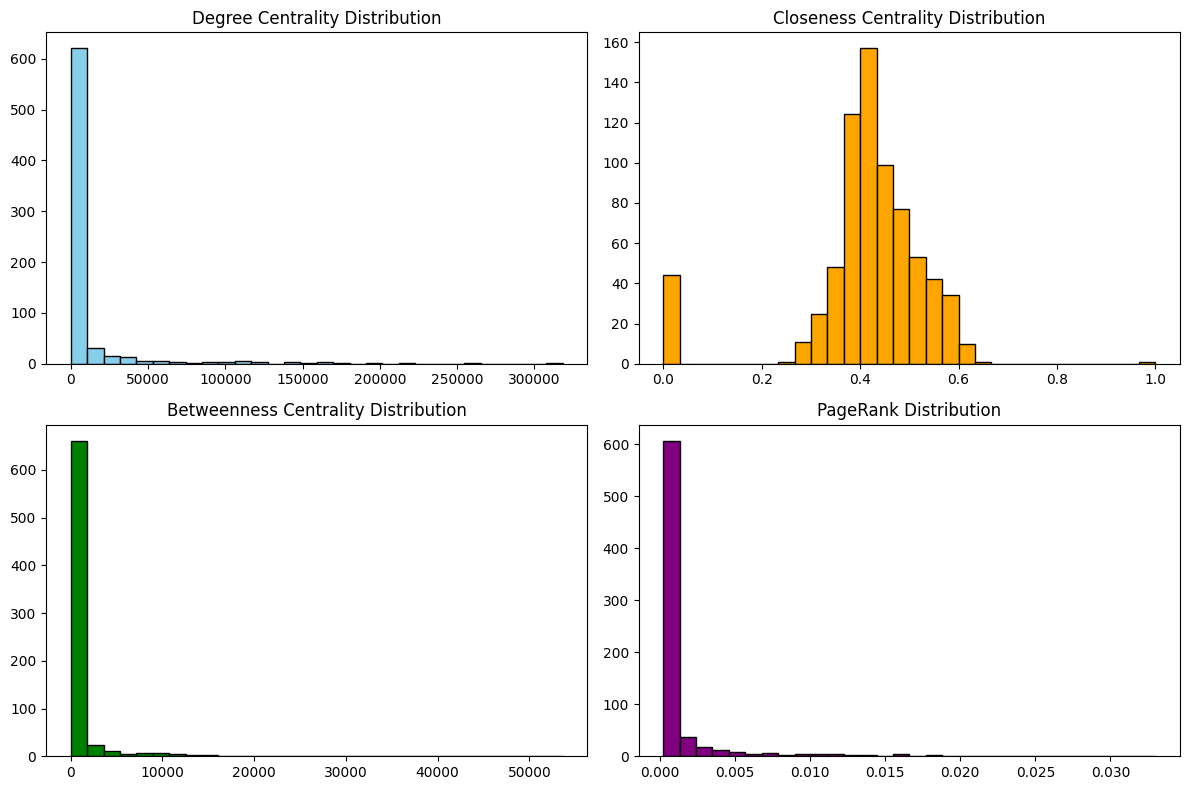

Top 5 (Degree): [('ORD', 318330), ('ATL', 263683), ('DFW', 216675), ('DTW', 198868), ('MSP', 197142)]
Top 5 (Closeness): [('FVS', 1.0), ('YIP', 0.643312101910828), ('MSP', 0.6229074889867842), ('MEM', 0.6190893169877408), ('ORD', 0.6185476815398075)]
Top 5 (Betweenness): [('YIP', 53645.26113974617), ('MSP', 32596.823971644084), ('ATL', 27053.98881654039), ('DFW', 25411.545110947445), ('ORD', 21899.825723815982)]
Top 5 (PageRank): [('ORD', 0.03299553320284386), ('ATL', 0.028906832830915472), ('DFW', 0.027318977965343317), ('MSP', 0.024368162655804295), ('DTW', 0.020488159005117804)]


In [133]:
# Esempio: calcolo centralità per un singolo aeroporto
res_single = analyze_centrality(df, "DFW")
print(res_single)
# Esempio: { 
#   'airport': 'DFW',
#   'degree_centrality': 12345,
#   'closeness_centrality': 0.0123,
#   'betweenness_centrality': 456.78,
#   'pagerank': 0.00999
# }

# Esempio: calcolo e confronto per tutti
res_compare = compare_centralities(df)
print("Top 5 (Degree):", res_compare["top_degree"])
print("Top 5 (Closeness):", res_compare["top_closeness"])
print("Top 5 (Betweenness):", res_compare["top_betweenness"])
print("Top 5 (PageRank):", res_compare["top_pagerank"])

In [134]:
# Esempio: calcolo centralità per un singolo aeroporto
res_single = analyze_centrality(df, "FVS")
print(res_single)
# Esempio: { 
#   'airport': 'DFW',
#   'degree_centrality': 12345,
#   'closeness_centrality': 0.0123,
#   'betweenness_centrality': 456.78,
#   'pagerank': 0.00999
# }

{'airport': 'FVS', 'degree_centrality': 6, 'closeness_centrality': 1.0, 'betweenness_centrality': 0.0, 'pagerank': 0.0002188668833834093}


## FUNCTION TO CHECK EVENTUALY ANOMALIES ••

In [135]:
def check_flight_data(df):
    """
    Esegue alcuni controlli di base sul DataFrame:
    1) Duplicati
    2) Rotte con Origin == Destination
    3) Valori NaN per le colonne principali
    4) Codici IATA 'sospetti' (troppo corti/lunghi, etc.),
       se necessario.
    Ritorna un report di potenziali problemi.
    """
    problems = []
    
    # 1) Duplicati
    duplicate_rows = df[df.duplicated()]
    if not duplicate_rows.empty:
        problems.append(f"Sono stati trovati {len(duplicate_rows)} duplicati nel DataFrame.")
    
    # 2) Rotte con Origin == Destination
    same_route = df[df['Origin_airport'] == df['Destination_airport']]
    if not same_route.empty:
        problems.append(f"Sono state trovate {len(same_route)} righe con Origin == Destination.")
    
    # 3) Valori mancanti nelle colonne chiave
    missing_origin = df['Origin_airport'].isna().sum()
    missing_destination = df['Destination_airport'].isna().sum()
    if missing_origin > 0:
        problems.append(f"Sono presenti {missing_origin} valori NaN in 'Origin_airport'.")
    if missing_destination > 0:
        problems.append(f"Sono presenti {missing_destination} valori NaN in 'Destination_airport'.")
    
    # (Opzionale) 4) Codici IATA troppo corti/lunghi
    #   Esempio: in molte situazioni i codici IATA sono 3 caratteri, ma alcuni dataset hanno 4 (ICAO).
    #   Puoi abilitare o disabilitare questo check in base alle necessità.
    iata_sospetti = df[
        (df['Origin_airport'].str.len() < 3) | 
        (df['Origin_airport'].str.len() > 4) |
        (df['Destination_airport'].str.len() < 3) |
        (df['Destination_airport'].str.len() > 4)
    ]
    if not iata_sospetti.empty:
        problems.append(f"Sono stati trovati {len(iata_sospetti)} record con codici IATA di lunghezza anomala.")
    
    return problems


In [136]:
df_problems = check_flight_data(df)
if df_problems:
    print("=== PROBLEMI NEL DATAFRAME ===")
    for p in df_problems:
        print(" -", p)
else:
    print("Nessun problema rilevato nel DataFrame.")


=== PROBLEMI NEL DATAFRAME ===
 - Sono stati trovati 41753 duplicati nel DataFrame.
 - Sono state trovate 6517 righe con Origin == Destination.


## 2. Calcolo delle Centralità e Verifica Anomalie
Dopo avere calcolato tutte le centralità (Degree, Closeness, Betweenness, PageRank) per tutti i nodi, facciamo un controllo su eventuali outlier:

Closeness = 1.0 (o > 0.9, a tua scelta) è rarissimo in un flight network reale.
Valori molto più alti della media in Betweenness. Es. se un aeroporto supera di 3–4 deviazioni standard la media.
Idem su PageRank (anche se qui raramente arriva a 1.0, di solito è < 0.05 in reti grandi, ma potresti avere outlier in rete piccola).

In [137]:
def detect_centrality_anomalies(degree_dict, closeness_dict, betweenness_dict, pagerank_dict):
    """
    Analizza i dizionari di centralità e individua possibili valori anomali.
    Ritorna un report con i nodi (aeroporti) sospetti.
    """
    anomalies = []
    
    # 1) Closeness anomala
    #    Esempio: closeness >= 1.0 o molto vicina a 1.0
    for airport, val in closeness_dict.items():
        if val >= 0.9999:  # soglia personalizzabile
            anomalies.append(f"[CLOSENESS] {airport} = {val:.4f} (sospetto: troppo alto)")
    
    # 2) Betweenness anomala
    #    Calcoliamo media e std, e consideriamo outlier chi supera (media + 3*std)
    bet_vals = list(betweenness_dict.values())
    if len(bet_vals) > 1:  # per evitare errore in reti minuscole
        mean_bet = np.mean(bet_vals)
        std_bet = np.std(bet_vals)
        high_cutoff = mean_bet + 3 * std_bet  # soglia di 3 sigma
        for airport, val in betweenness_dict.items():
            if val > high_cutoff:
                anomalies.append(f"[BETWEENNESS] {airport} = {val:.2f} (oltre 3x std dalla media)")
    
    # 3) PageRank anomalo
    #    Idem, cerchiamo outlier > media + 3*std
    pr_vals = list(pagerank_dict.values())
    if len(pr_vals) > 1:
        mean_pr = np.mean(pr_vals)
        std_pr = np.std(pr_vals)
        pr_cutoff = mean_pr + 3 * std_pr
        for airport, val in pagerank_dict.items():
            if val > pr_cutoff:
                anomalies.append(f"[PAGERANK] {airport} = {val:.4f} (oltre 3x std dalla media)")
    
    # 4) (Opzionale) Degree eccezionalmente alto
    deg_vals = list(degree_dict.values())
    if len(deg_vals) > 1:
        mean_deg = np.mean(deg_vals)
        std_deg = np.std(deg_vals)
        deg_cutoff = mean_deg + 3 * std_deg
        for airport, val in degree_dict.items():
            if val > deg_cutoff:
                anomalies.append(f"[DEGREE] {airport} = {val} (oltre 3x std dalla media)")
    
    return anomalies


## Integrazione con compare_centralities
Dopo aver calcolato le 4 centralità, possiamo fare il check:

In [138]:
def compare_centralities_with_checks(df):
    """
    Estensione di compare_centralities:
    - calcola le 4 centralità
    - fa i plot
    - restituisce le top5
    - esegue controlli su outlier/anomalie
    """
    # Calcola le 4 metriche per tutti i nodi
    graph = build_directed_graph(df)
    degree_dict = compute_all_degree_centralities(graph)
    closeness_dict = compute_all_closeness_centralities(graph)
    betweenness_dict = brandes_betweenness_centrality(graph)
    pagerank_dict = compute_pagerank(graph)

    # Plot (come prima)
    nodes = list(graph.keys())
    degree_vals = [degree_dict[n] for n in nodes]
    closeness_vals = [closeness_dict[n] for n in nodes]
    betweenness_vals = [betweenness_dict[n] for n in nodes]
    pagerank_vals = [pagerank_dict[n] for n in nodes]

    plt.figure(figsize=(12,8))
    plt.subplot(2,2,1)
    plt.hist(degree_vals, bins=30, color='skyblue', edgecolor='black')
    plt.title("Degree Centrality Distribution")

    plt.subplot(2,2,2)
    plt.hist(closeness_vals, bins=30, color='orange', edgecolor='black')
    plt.title("Closeness Centrality Distribution")

    plt.subplot(2,2,3)
    plt.hist(betweenness_vals, bins=30, color='green', edgecolor='black')
    plt.title("Betweenness Centrality Distribution")

    plt.subplot(2,2,4)
    plt.hist(pagerank_vals, bins=30, color='purple', edgecolor='black')
    plt.title("PageRank Distribution")
    plt.tight_layout()
    plt.show()

    # Top5
    def top5(d):
        return sorted(d.items(), key=lambda x: x[1], reverse=True)[:5]
    top_degree = top5(degree_dict)
    top_closeness = top5(closeness_dict)
    top_betweenness = top5(betweenness_dict)
    top_pagerank = top5(pagerank_dict)

    # Check anomalies
    anomalies = detect_centrality_anomalies(
        degree_dict,
        closeness_dict,
        betweenness_dict,
        pagerank_dict
    )

    results = {
        "top_degree": top_degree,
        "top_closeness": top_closeness,
        "top_betweenness": top_betweenness,
        "top_pagerank": top_pagerank,
        "anomalies": anomalies
    }

    return results


=== Avvisi sul DataFrame di volo ===
 - Sono stati trovati 41753 duplicati nel DataFrame.
 - Sono state trovate 6517 righe con Origin == Destination.
Procedi con cautela, potresti voler 'ripulire' i dati.


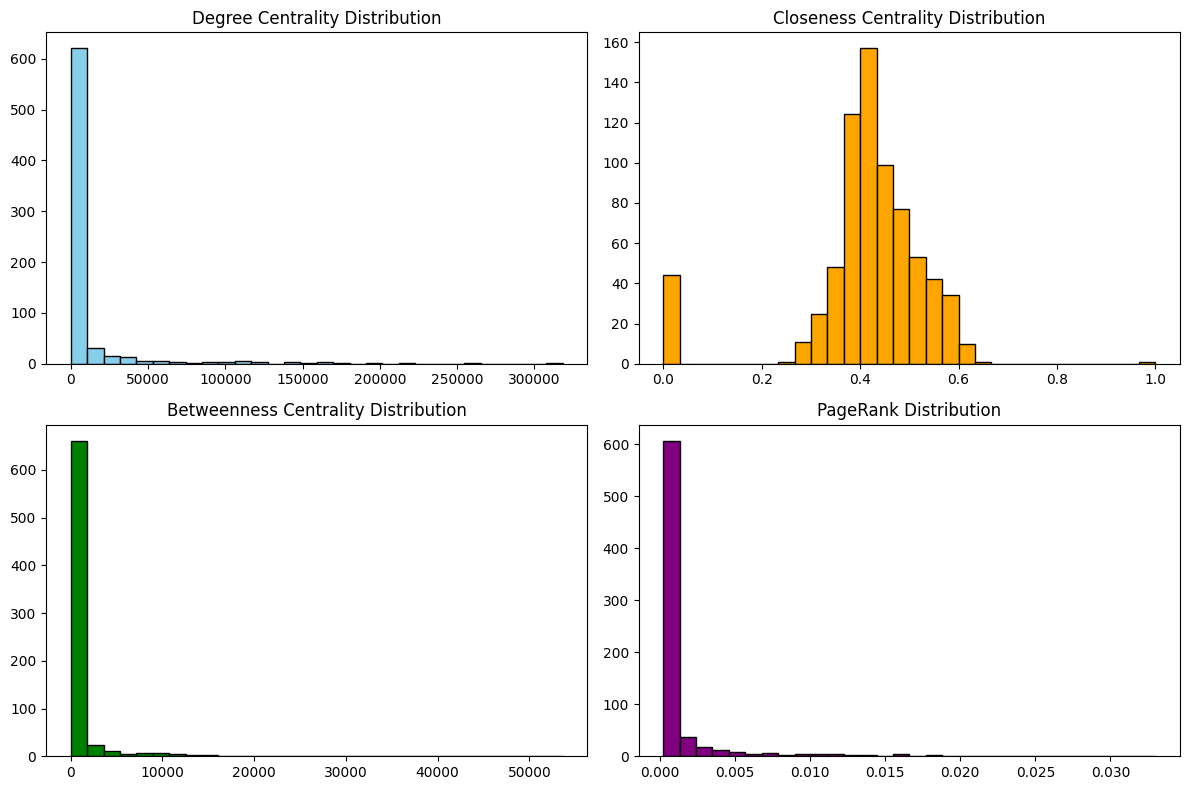


--- Top 5 (Degree) ---
[('ORD', 318330), ('ATL', 263683), ('DFW', 216675), ('DTW', 198868), ('MSP', 197142)]
--- Top 5 (Closeness) ---
[('FVS', 1.0), ('YIP', 0.643312101910828), ('MSP', 0.6229074889867842), ('MEM', 0.6190893169877408), ('ORD', 0.6185476815398075)]
--- Top 5 (Betweenness) ---
[('YIP', 53645.26113974617), ('MSP', 32596.823971644084), ('ATL', 27053.98881654039), ('DFW', 25411.545110947445), ('ORD', 21899.825723815982)]
--- Top 5 (PageRank) ---
[('ORD', 0.03299553320284386), ('ATL', 0.028906832830915472), ('DFW', 0.027318977965343317), ('MSP', 0.024368162655804295), ('DTW', 0.020488159005117804)]

=== Anomalie Rilevate nelle Centralità ===
 - [CLOSENESS] FVS = 1.0000 (sospetto: troppo alto)
 - [BETWEENNESS] SEA = 17024.36 (oltre 3x std dalla media)
 - [BETWEENNESS] PHX = 12884.94 (oltre 3x std dalla media)
 - [BETWEENNESS] DFW = 25411.55 (oltre 3x std dalla media)
 - [BETWEENNESS] SLC = 12167.16 (oltre 3x std dalla media)
 - [BETWEENNESS] ABQ = 13832.02 (oltre 3x std dall

In [139]:
# 1) Controlla preliminarmente il DataFrame
data_issues = check_flight_data(df)
if data_issues:
    print("=== Avvisi sul DataFrame di volo ===")
    for problem in data_issues:
        print(" -", problem)
    print("Procedi con cautela, potresti voler 'ripulire' i dati.")
else:
    print("Nessun problema macroscopico nel DataFrame (duplicati, missing, etc.).")

# 2) Confronto centralità + check anomalie
res_compare = compare_centralities_with_checks(df)

print("\n--- Top 5 (Degree) ---")
print(res_compare["top_degree"])
print("--- Top 5 (Closeness) ---")
print(res_compare["top_closeness"])
print("--- Top 5 (Betweenness) ---")
print(res_compare["top_betweenness"])
print("--- Top 5 (PageRank) ---")
print(res_compare["top_pagerank"])

if res_compare["anomalies"]:
    print("\n=== Anomalie Rilevate nelle Centralità ===")
    for a in res_compare["anomalies"]:
        print(" -", a)
else:
    print("\nNessuna anomalia rilevata nelle metriche di centralità.")


## necessaria una pulizia del dataset per via di diverse incorenze :: 



In [ ]:
# Rimuovi tutte le righe duplicate (che hanno esattamente gli stessi valori su ogni colonna)
df_clean = df.drop_duplicates()

In [ ]:
df_clean = df_clean[df_clean['Origin_airport'] != df_clean['Destination_airport']]

In [ ]:
df_agg = (
    df_clean
    .groupby(['Origin_airport', 'Destination_airport'], as_index=False)
    .agg({'Passengers': 'sum', 'Seats': 'sum', 'Flights': 'sum', 'Distance': 'mean'})
)

Nessun problema macroscopico nei dati ripuliti.


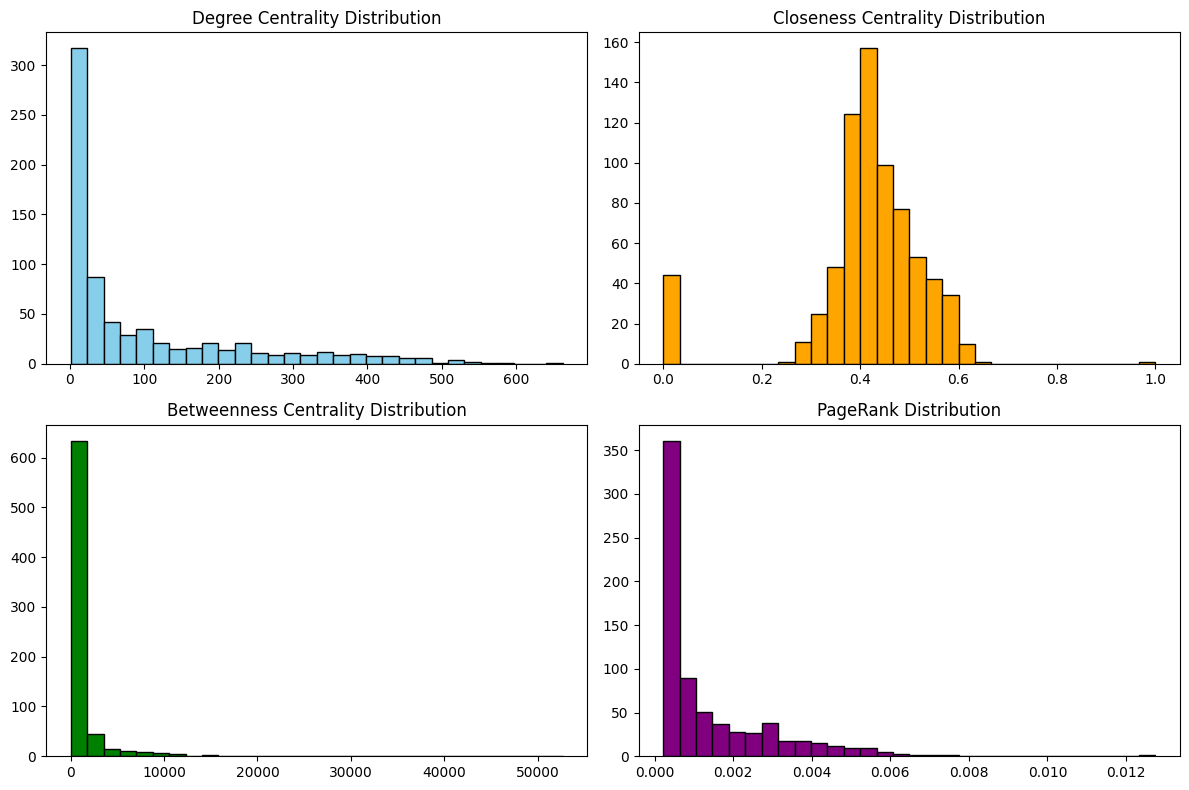

In [140]:
# 1) Elimina duplicati totali
df_clean = df.drop_duplicates()

# 2) Elimina self-loop
df_clean = df_clean[df_clean['Origin_airport'] != df_clean['Destination_airport']]

# 3) (Opzionale) Aggrega le rotte unendo i multipli su date diverse
df_clean = (
    df_clean
    .groupby(['Origin_airport', 'Destination_airport'], as_index=False)
    .agg({
        'Passengers': 'sum', 
        'Seats': 'sum', 
        'Flights': 'sum', 
        'Distance': 'mean'
        # ... se hai altre colonne da aggregare
    })
)

# 4) Esegui di nuovo i controlli e le analisi
df_problems = check_flight_data(df_clean)
if df_problems:
    for p in df_problems:
        print(" -", p)
else:
    print("Nessun problema macroscopico nei dati ripuliti.")

# 5) Lancia compare_centralities_with_checks
res_compare = compare_centralities_with_checks(df_clean)

# ... e così via


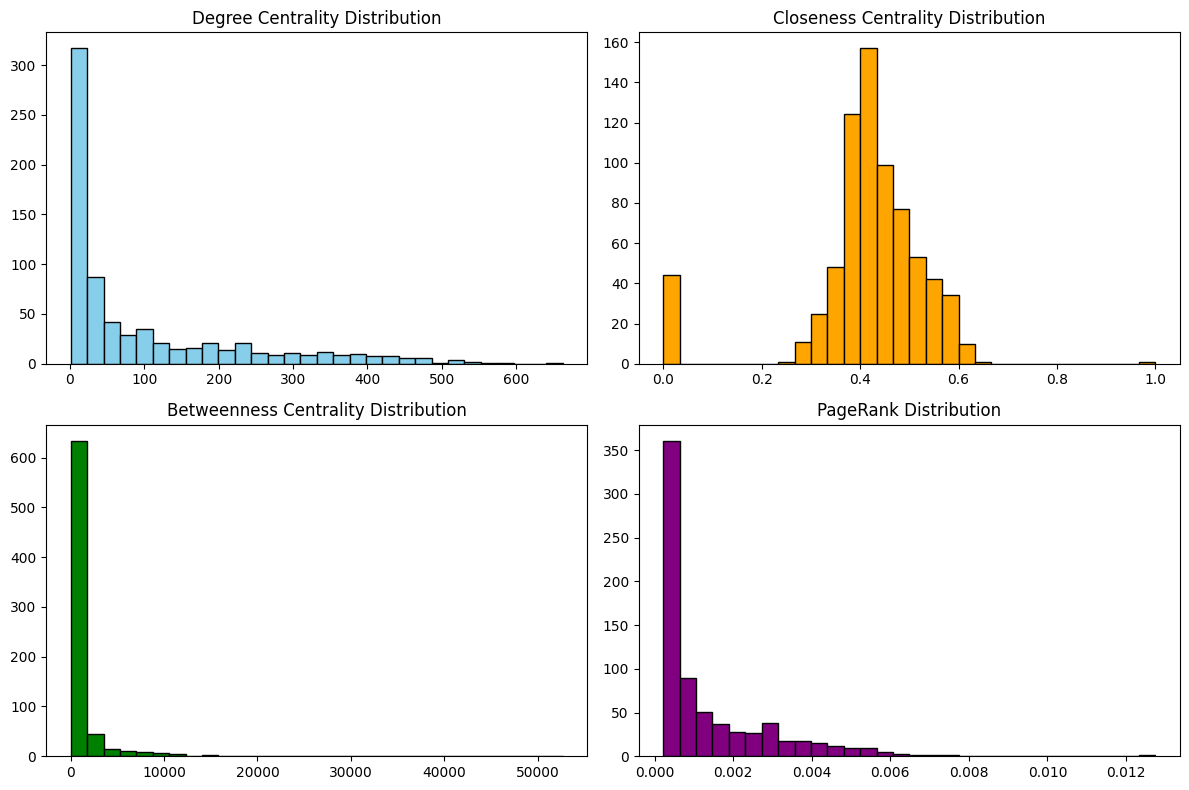

In [141]:
res_compare = compare_centralities_with_checks(df_clean)


In [142]:
print("=== RISULTATI POST-PULIZIA ===")
print("\n--- Top 5 (Degree) ---")
print(res_compare["top_degree"])
print("--- Top 5 (Closeness) ---")
print(res_compare["top_closeness"])
print("--- Top 5 (Betweenness) ---")
print(res_compare["top_betweenness"])
print("--- Top 5 (PageRank) ---")
print(res_compare["top_pagerank"])

if res_compare["anomalies"]:
    print("\n=== Anomalie Rilevate nelle Centralità ===")
    for a in res_compare["anomalies"]:
        print(" -", a)
else:
    print("\nNessuna anomalia rilevata nelle metriche di centralità.")


=== RISULTATI POST-PULIZIA ===

--- Top 5 (Degree) ---
[('YIP', 663), ('MSP', 581), ('MEM', 562), ('ATL', 537), ('MCI', 537)]
--- Top 5 (Closeness) ---
[('FVS', 1.0), ('YIP', 0.643312101910828), ('MSP', 0.6229074889867842), ('MEM', 0.6190893169877408), ('ORD', 0.6185476815398075)]
--- Top 5 (Betweenness) ---
[('YIP', 52692.185173451544), ('MSP', 14567.363873580241), ('MEM', 14120.521429976758), ('MCI', 12697.602581183593), ('SHV', 11663.349550095149)]
--- Top 5 (PageRank) ---
[('YIP', 0.012747848534144731), ('SHV', 0.007666842304774863), ('MSP', 0.007601362519787647), ('MEM', 0.0070905187494729885), ('MCI', 0.0070710180188639634)]

=== Anomalie Rilevate nelle Centralità ===
 - [CLOSENESS] FVS = 1.0000 (sospetto: troppo alto)
 - [BETWEENNESS] ATL = 10071.43 (oltre 3x std dalla media)
 - [BETWEENNESS] IAD = 9863.21 (oltre 3x std dalla media)
 - [BETWEENNESS] JFK = 9184.65 (oltre 3x std dalla media)
 - [BETWEENNESS] MCI = 12697.60 (oltre 3x std dalla media)
 - [BETWEENNESS] MEM = 14120.52

In [143]:
df_fvs = df_clean[(df_clean["Origin_airport"] == "FVS") | (df_clean["Destination_airport"] == "FVS")]
df_yip = df_clean[(df_clean["Origin_airport"] == "YIP") | (df_clean["Destination_airport"] == "YIP")]

In [144]:
def inspect_airport(df, airport_code):
    """
    Mostra statistiche su un singolo aeroporto 'airport_code' nel DataFrame.
    Esempi di analisi:
        - Count totale di righe associate (Origin o Destination)
        - Principali destinazioni (quante volte appare come origin -> altra destinazione)
        - Principali origini (quante volte appare come destination -> origin)
        - Statistiche su Passengers, Flights, Seats
    """
    # Filtra righe dove airport_code appare come Origin o come Destination
    mask = (df['Origin_airport'] == airport_code) | (df['Destination_airport'] == airport_code)
    sub_df = df[mask]

    print(f"\n=== Ispezione per l'aeroporto: {airport_code} ===")
    print(f"Righe totali trovate: {len(sub_df)}")

    # Conta righe come Origin
    sub_df_origin = sub_df[sub_df['Origin_airport'] == airport_code]
    print(f"  - Come Origin: {len(sub_df_origin)} righe")
    if len(sub_df_origin) > 0:
        # Principali destinazioni
        dest_counts = sub_df_origin['Destination_airport'].value_counts().head(10)
        print("  - Principali 10 Destination_airport:")
        print(dest_counts)

    # Conta righe come Destination
    sub_df_dest = sub_df[sub_df['Destination_airport'] == airport_code]
    print(f"  - Come Destination: {len(sub_df_dest)} righe")
    if len(sub_df_dest) > 0:
        origin_counts = sub_df_dest['Origin_airport'].value_counts().head(10)
        print("  - Principali 10 Origin_airport:")
        print(origin_counts)

    # Statistiche su Passengers, Flights, Seats
    if 'Passengers' in df.columns:
        mean_pass = sub_df['Passengers'].mean()
        print(f"  - Media Passengers nelle rotte che coinvolgono {airport_code}: {mean_pass:.2f}")
    if 'Flights' in df.columns:
        mean_flights = sub_df['Flights'].mean()
        print(f"  - Media Flights nelle rotte che coinvolgono {airport_code}: {mean_flights:.2f}")
    if 'Seats' in df.columns:
        mean_seats = sub_df['Seats'].mean()
        print(f"  - Media Seats nelle rotte che coinvolgono {airport_code}: {mean_seats:.2f}")

    # (Opzionale) Mostra un campione di righe
    print("\nEsempio di 5 righe:")
    print(sub_df.head(5))

# Uso esempio:
inspect_airport(df_clean, "FVS")
inspect_airport(df_clean, "YIP")



=== Ispezione per l'aeroporto: FVS ===
Righe totali trovate: 2
  - Come Origin: 1 righe
  - Principali 10 Destination_airport:
Destination_airport
BYI    1
Name: count, dtype: int64
  - Come Destination: 1 righe
  - Principali 10 Origin_airport:
Origin_airport
SLC    1
Name: count, dtype: int64
  - Media Passengers nelle rotte che coinvolgono FVS: 0.00
  - Media Flights nelle rotte che coinvolgono FVS: 6.00
  - Media Seats nelle rotte che coinvolgono FVS: 0.00

Esempio di 5 righe:
      Origin_airport Destination_airport  Passengers  Seats  Flights  Distance
13123            FVS                 BYI           0      0        1     134.0
32593            SLC                 FVS           0      0       11     210.0

=== Ispezione per l'aeroporto: YIP ===
Righe totali trovate: 663
  - Come Origin: 333 righe
  - Principali 10 Destination_airport:
Destination_airport
ABE    1
MRC    1
MOT    1
MOR    1
MOP    1
MOB    1
MNN    1
MMI    1
MLU    1
MKL    1
Name: count, dtype: int64
  - Come

In [145]:
def summarize_routes(df):
    """
    Ritorna un DataFrame riassuntivo: per ogni (Origin -> Destination),
    quante volte compare, e la somma (o media) di Passengers, etc.
    """
    grouped = (
        df.groupby(['Origin_airport', 'Destination_airport'], as_index=False)
          .agg({
              'Passengers': 'sum',
              'Flights': 'sum',
              'Seats': 'sum'
              # Se vuoi altre statistiche, puoi aggiungere .agg() personalizzato
          })
    )
    return grouped

def top_connections_for_airport(df_summary, airport_code, top=10):
    """
    Dato un df_summary che elenca (Origin, Destination, sums/means),
    estrai i top collegamenti (in entrata o in uscita) per un determinato aeroporto.
    """
    # Rotte in uscita
    outgoing = df_summary[df_summary['Origin_airport'] == airport_code]
    outgoing_sorted = outgoing.sort_values(by='Passengers', ascending=False).head(top)
    
    # Rotte in entrata
    incoming = df_summary[df_summary['Destination_airport'] == airport_code]
    incoming_sorted = incoming.sort_values(by='Passengers', ascending=False).head(top)
    
    return outgoing_sorted, incoming_sorted

# Esempio d'uso
df_summary = summarize_routes(df_clean)
out_fvs, in_fvs = top_connections_for_airport(df_summary, "FVS", top=10)
print("=== Rotte in uscita da FVS ===")
print(out_fvs)
print("\n=== Rotte in entrata a FVS ===")
print(in_fvs)


=== Rotte in uscita da FVS ===
      Origin_airport Destination_airport  Passengers  Flights  Seats
13123            FVS                 BYI           0        1      0

=== Rotte in entrata a FVS ===
      Origin_airport Destination_airport  Passengers  Flights  Seats
32593            SLC                 FVS           0       11      0


In [146]:
def check_degree_from_dataframe(df_clean, airport_code):
    """
    Ricostruisce quickly un 'set' di destinazioni e un 'set' di origini
    partendo dal DataFrame, per verificare (in modo un po' più veloce)
    quanti nodi unici si collegano a <airport_code>.
    """
    # Rotte in uscita
    out_mask = (df_clean['Origin_airport'] == airport_code)
    out_dest_set = set(df_clean.loc[out_mask, 'Destination_airport'])
    
    # Rotte in entrata
    in_mask = (df_clean['Destination_airport'] == airport_code)
    in_orig_set = set(df_clean.loc[in_mask, 'Origin_airport'])
    
    print(f"\n=== Collegamenti per {airport_code} ===")
    print(f"Uscita -> {airport_code} ha {len(out_dest_set)} destinazioni uniche.")
    print(f"Entrata -> {airport_code} ha {len(in_orig_set)} origini uniche.")
    print(f"Degree totale (senza BFS, solo set) = {len(out_dest_set) + len(in_orig_set)} (può esserci overlap).")

# Esempio
check_degree_from_dataframe(df_clean, "YIP")
check_degree_from_dataframe(df_clean, "FVS")



=== Collegamenti per YIP ===
Uscita -> YIP ha 333 destinazioni uniche.
Entrata -> YIP ha 330 origini uniche.
Degree totale (senza BFS, solo set) = 663 (può esserci overlap).

=== Collegamenti per FVS ===
Uscita -> FVS ha 1 destinazioni uniche.
Entrata -> FVS ha 1 origini uniche.
Degree totale (senza BFS, solo set) = 2 (può esserci overlap).


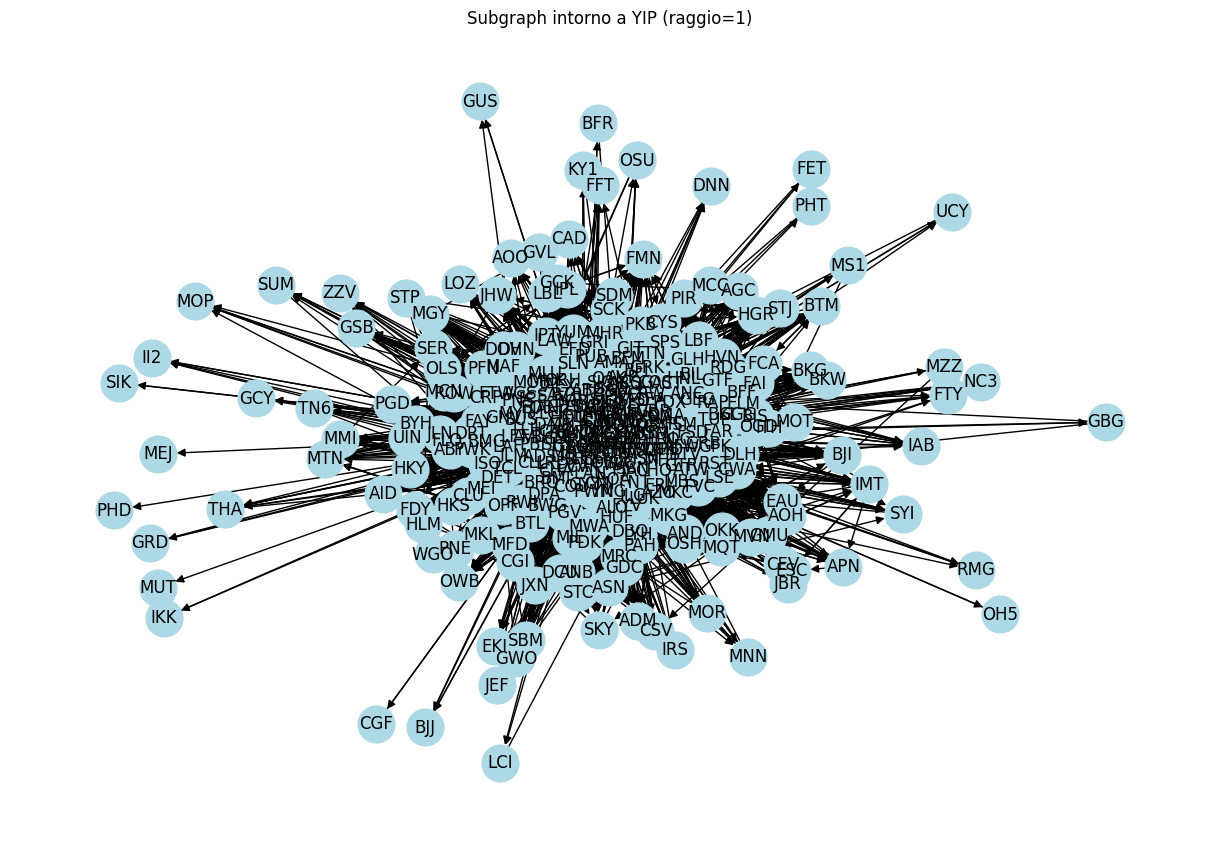

In [147]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict, deque

def build_directed_graph_simple(df):
    """
    Versione semplificata: adjacency list da df_clean
    """
    graph = defaultdict(set)
    for _, row in df.iterrows():
        o, d = row["Origin_airport"], row["Destination_airport"]
        if o != d:
            graph[o].add(d)
            # non aggiungo l'inverso perche' e' direzionale
    return graph

def extract_subgraph(graph, airport, radius=1):
    """
    Estrae un sub-grafo di nodi che sono entro 'radius' salti dall'airport.
    radius=1 => prendi tutti i vicini diretti (in e out).
    radius=2 => prendi i vicini dei vicini, ecc. (solo direzione in BFS).
    """
    visited = set()
    queue = deque([(airport, 0)])
    sub_nodes = set()

    # Per avere anche link in ingresso, devi fare BFS "all directions"? 
    # Oppure modifichi l'architettura in un grafo undirected temp. 
    # Per semplicità, lo facciamo su un grafo orientato forward.

    while queue:
        current, dist = queue.popleft()
        if current not in visited:
            visited.add(current)
            sub_nodes.add(current)
            if dist < radius:
                for neigh in graph[current]:
                    queue.append((neigh, dist+1))
    return sub_nodes

def visualize_subgraph(df_clean, airport_code, radius=1):
    """
    Visualizza un sub-grafo centrato su 'airport_code' con un BFS di 'radius' passi.
    """
    g = build_directed_graph_simple(df_clean)
    sub_nodes = extract_subgraph(g, airport_code, radius=radius)
    
    # Costruisco un DiGraph di NetworkX con questi nodi
    G = nx.DiGraph()
    for n in sub_nodes:
        G.add_node(n)
    for n in sub_nodes:
        for neigh in g[n]:
            if neigh in sub_nodes:
                G.add_edge(n, neigh)
    
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G, k=0.5, seed=42)
    nx.draw(G, pos, with_labels=True, node_color='lightblue',
            node_size=700, arrows=True, arrowstyle='-|>', arrowsize=12)
    plt.title(f"Subgraph intorno a {airport_code} (raggio={radius})")
    plt.show()

# Esempio:
visualize_subgraph(df_clean, "YIP", radius=1)

In [148]:
def detect_volume_outliers(df, column="Passengers", z_threshold=5):
    """
    Rileva righe con z-score > z_threshold sulla colonna specificata (Passengers di default).
    """
    if column not in df.columns:
        return []
    
    col_vals = df[column]
    mean_val = col_vals.mean()
    std_val = col_vals.std()
    
    outliers = df[(col_vals - mean_val).abs() > z_threshold * std_val]
    return outliers

# Esempio: Trova outlier su Passengers
passenger_outliers = detect_volume_outliers(df_clean, column="Passengers", z_threshold=5)
print(f"Righe outlier su Passengers > 5-sigma: {len(passenger_outliers)}")
print(passenger_outliers.head(10))


Righe outlier su Passengers > 5-sigma: 328
     Origin_airport Destination_airport  Passengers     Seats  Flights  \
323             ABQ                 PHX    11271129  17191871   132240   
1659            ANC                 SEA    14299266  20939001   144754   
1845            ATL                 BOS    13092014  17794904   103310   
1852            ATL                 BWI    10010118  13621460    93453   
1866            ATL                 CLT     8586469  13640369   117148   
1881            ATL                 DCA    11557164  16633172   115585   
1884            ATL                 DFW    21626001  30066413   201850   
1889            ATL                 DTW     9948528  14768441   109746   
1899            ATL                 EWR    15023406  21506569   152753   
1906            ATL                 FLL    17212233  22281953   117237   

         Distance  
323    328.026070  
1659  1448.478774  
1845   946.000000  
1852   576.000000  
1866   227.000000  
1881   547.000000  
18

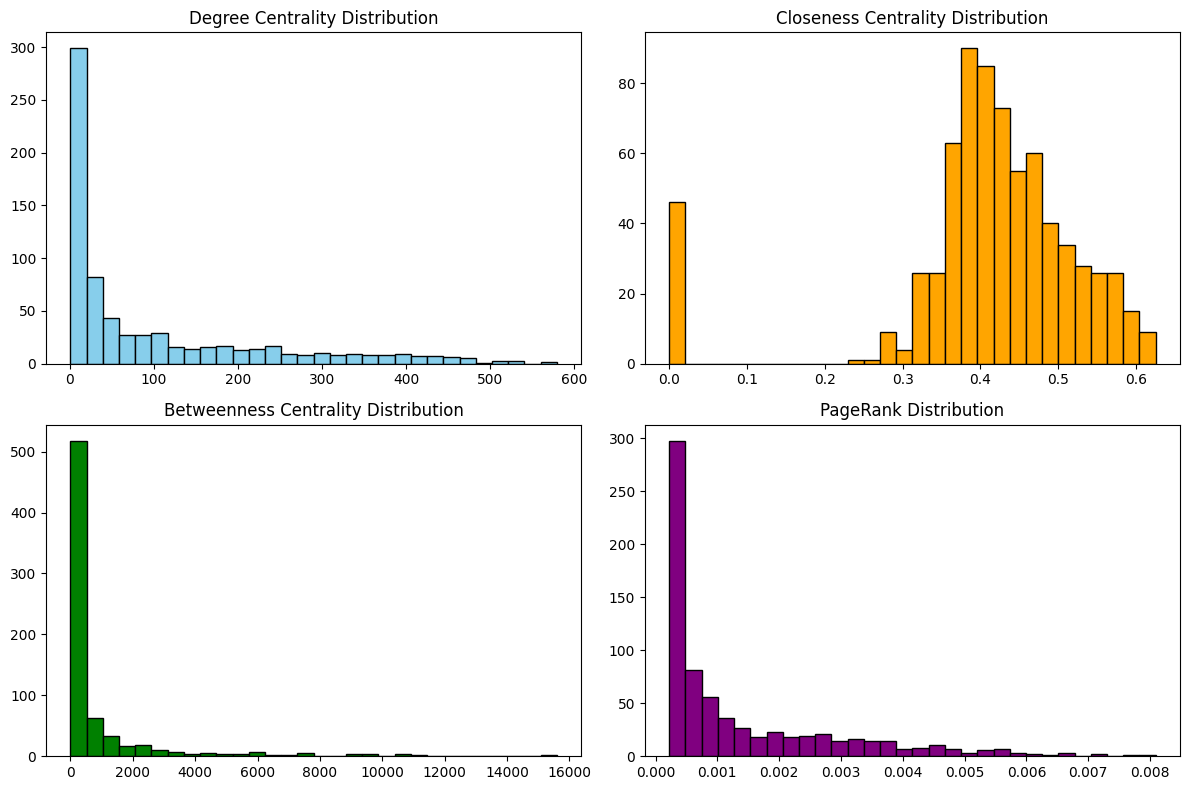

TOP 5 (Degree), senza FVS e YIP: [('MSP', 579), ('MEM', 560), ('ATL', 535), ('MCI', 535), ('ORD', 522)]


In [149]:
def remove_suspicious_nodes(df_clean, suspicious_nodes):
    """
    Rimuove tutte le righe che coinvolgono un certo set di aeroporti 'suspicious_nodes'.
    Ritorna un df_new "ripulito".
    """
    mask = (~df_clean['Origin_airport'].isin(suspicious_nodes)) & \
           (~df_clean['Destination_airport'].isin(suspicious_nodes))
    df_new = df_clean[mask]
    return df_new

# Esempio: escludi FVS e YIP
df_no_fvs_yip = remove_suspicious_nodes(df_clean, ["FVS", "YIP"])

# Rifai l'analisi di centralità
res_compare_no_suspects = compare_centralities_with_checks(df_no_fvs_yip)
print("TOP 5 (Degree), senza FVS e YIP:", res_compare_no_suspects["top_degree"])
# ... e così via

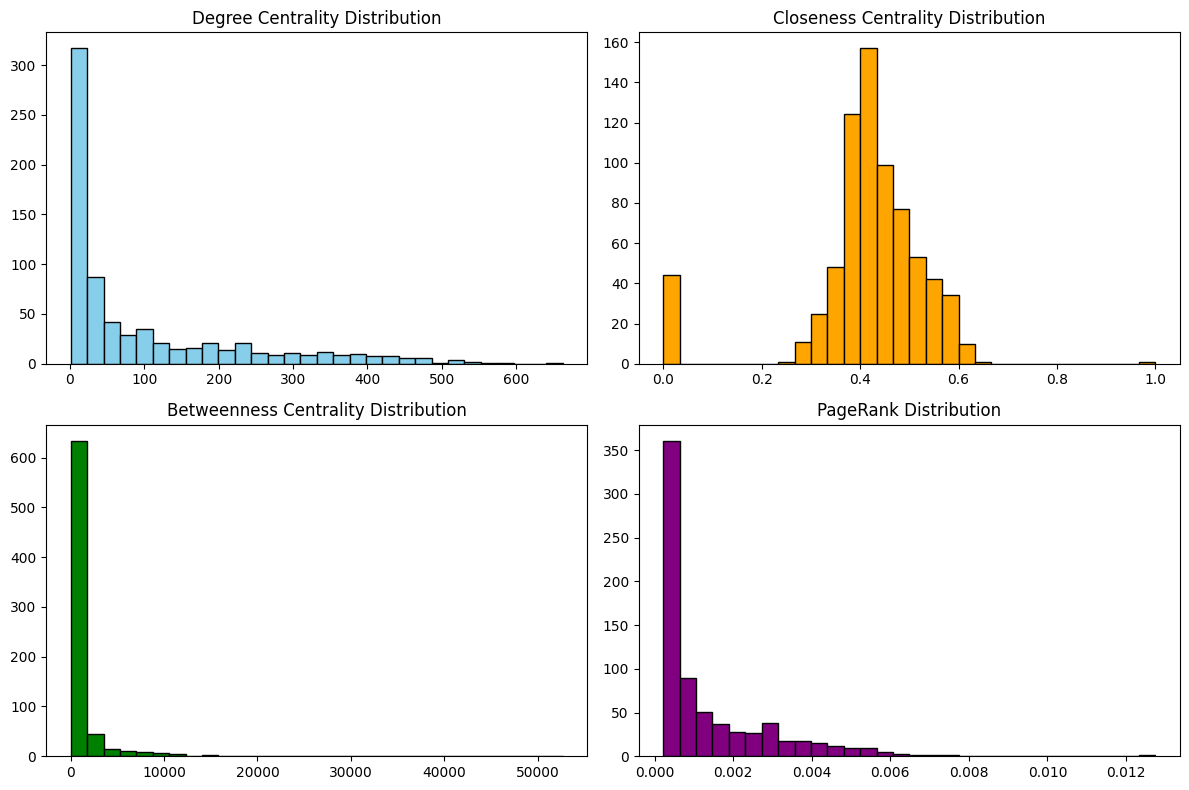

TOP 5 (Degree) [('YIP', 663), ('MSP', 581), ('MEM', 562), ('ATL', 537), ('MCI', 537)]


In [151]:
res_compare_no_suspects = compare_centralities_with_checks(df_clean)
print("TOP 5 (Degree)", res_compare_no_suspects["top_degree"])
# ... e così via

In [153]:
df_clean

,Origin_airport,Destination_airport,Passengers,Seats,Flights,Distance
0,1B1,BDL,1,8,1,58.0
1,ABE,ACT,0,50,1,1364.0
2,ABE,ACY,73,103,1,94.0
3,ABE,ADS,0,0,1,1295.0
4,ABE,AGS,104,120,2,618.0
...,...,...,...,...,...,...
36444,YUM,YKM,0,115,1,1010.0
36445,ZZV,MCI,0,0,1,685.0
36446,ZZV,PDK,0,0,5,439.0
36447,ZZV,SHV,0,0,1,843.0


In [160]:
display(df_clean)

,Origin_airport,Destination_airport,Passengers,Seats,Flights,Distance
0,1B1,BDL,1,8,1,58.0
1,ABE,ACT,0,50,1,1364.0
2,ABE,ACY,73,103,1,94.0
3,ABE,ADS,0,0,1,1295.0
4,ABE,AGS,104,120,2,618.0
...,...,...,...,...,...,...
36444,YUM,YKM,0,115,1,1010.0
36445,ZZV,MCI,0,0,1,685.0
36446,ZZV,PDK,0,0,5,439.0
36447,ZZV,SHV,0,0,1,843.0


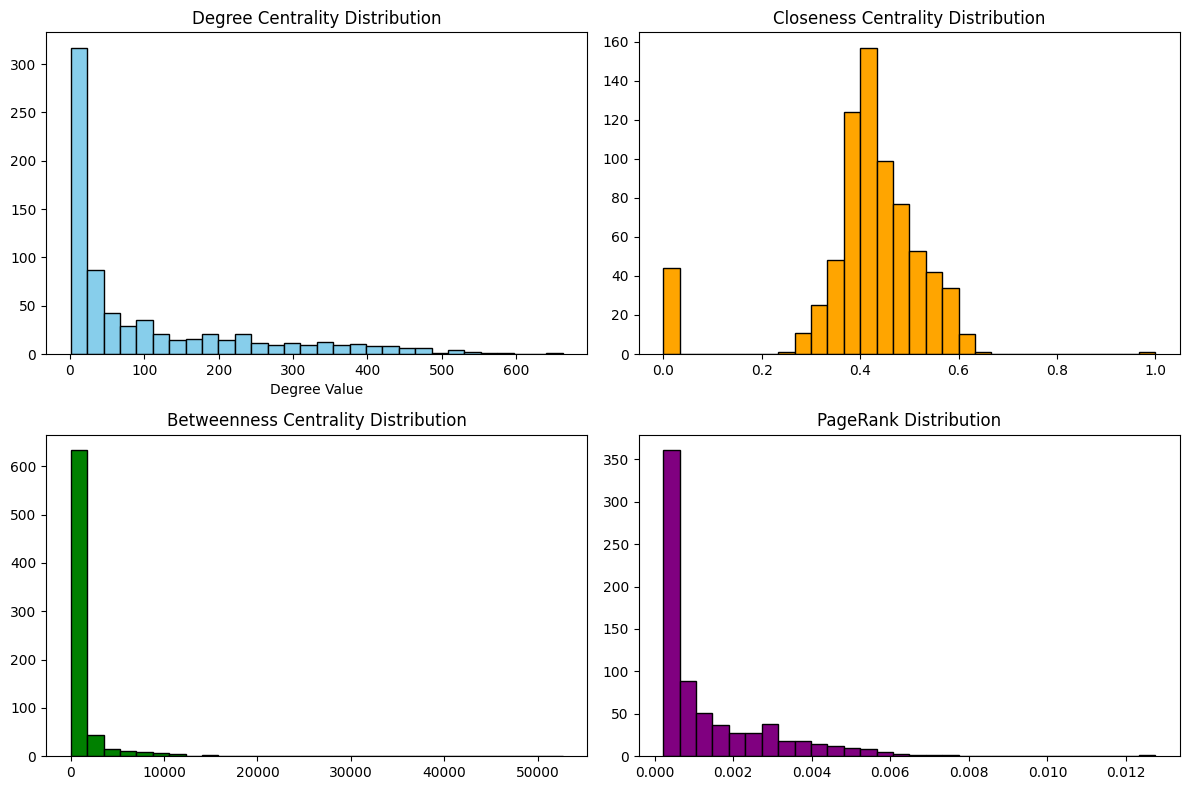

{'top_degree': [('YIP', 663),
  ('MSP', 581),
  ('MEM', 562),
  ('MCI', 537),
  ('ATL', 537)],
 'top_closeness': [('FVS', 1.0),
  ('YIP', 0.643312101910828),
  ('MSP', 0.6229074889867842),
  ('MEM', 0.6190893169877408),
  ('ORD', 0.6185476815398075)],
 'top_betweenness': [('YIP', 52692.18517345156),
  ('MSP', 14567.363873580256),
  ('MEM', 14120.521429976747),
  ('MCI', 12697.602581183593),
  ('SHV', 11663.349550095134)],
 'top_pagerank': [('YIP', 0.012747848534144733),
  ('SHV', 0.00766684230477486),
  ('MSP', 0.007601362519787648),
  ('MEM', 0.007090518749472991),
  ('MCI', 0.007071018018863965)]}

In [162]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict, deque
import numpy as np

def build_directed_graph(df):
    """
    Build a directed graph (no duplicate edges) from a DataFrame with columns:
      - Origin_airport
      - Destination_airport
      - (Passengers, Seats, Flights, Distance) are ignored for unweighted edges.

    We use a dictionary of sets so that each (origin -> destination) edge is unique.
    """
    graph = defaultdict(set)

    for _, row in df.iterrows():
        origin = row["Origin_airport"]
        dest = row["Destination_airport"]

        # Skip self-loops
        if origin == dest:
            continue

        # Add the edge (origin -> dest) to the adjacency set
        graph[origin].add(dest)

        # Ensure the destination also appears in the graph with an empty set
        if dest not in graph:
            graph[dest] = set()

    # Convert defaultdict(set) to a normal dict of sets
    return dict(graph)

def compute_all_degree_centralities(graph):
    """
    Return a dictionary: {node: in_degree + out_degree}
    out_degree is the size of the adjacency set for 'node'.
    in_degree is how many adjacency sets include 'node'.
    """
    # Initialize in_degree
    in_degree = {node: 0 for node in graph}

    # Populate in_degree
    for origin, neighbors in graph.items():
        for dest in neighbors:
            in_degree[dest] += 1

    # Build final degree dict
    degree_dict = {}
    for node in graph:
        out_deg = len(graph[node])
        degree_dict[node] = in_degree[node] + out_deg

    return degree_dict

def bfs_distances(graph, start):
    """
    Unweighted BFS: return a dict of minimum distances from 'start' to every node.
    If a node is unreachable, distance stays inf.
    """
    dist = {n: float('inf') for n in graph}
    dist[start] = 0
    queue = deque([start])

    while queue:
        current = queue.popleft()
        for neighbor in graph[current]:
            if dist[neighbor] == float('inf'):
                dist[neighbor] = dist[current] + 1
                queue.append(neighbor)

    return dist

def compute_all_closeness_centralities(graph):
    """
    Closeness(node) = (number_of_reachable_nodes) / (sum_of_distances_to_those_nodes).
    Use BFS to compute distances for each node.
    """
    closeness_dict = {}
    for node in graph:
        dist = bfs_distances(graph, node)
        valid = [d for other, d in dist.items() if (d < float('inf') and other != node)]
        if len(valid) == 0:
            closeness_dict[node] = 0.0
        else:
            closeness_dict[node] = len(valid) / sum(valid)
    return closeness_dict

def brandes_betweenness_centrality(graph):
    """
    Compute the betweenness centrality for ALL nodes in an unweighted directed graph.
    Returns a dict {node: betweenness_value}.
    This is the standard Brandes algorithm.
    """
    from collections import deque
    Cb = {v: 0.0 for v in graph}
    nodes = list(graph.keys())

    for s in nodes:
        # BFS to get shortest-path counts
        S = []
        P = {w: [] for w in graph}
        dist = {w: -1 for w in graph}
        sigma = {w: 0 for w in graph}

        dist[s] = 0
        sigma[s] = 1
        queue = deque([s])

        while queue:
            v = queue.popleft()
            S.append(v)
            for w in graph[v]:
                if dist[w] < 0:  # first time we see w
                    dist[w] = dist[v] + 1
                    queue.append(w)
                if dist[w] == dist[v] + 1:
                    sigma[w] += sigma[v]
                    P[w].append(v)

        # Back-propagation
        delta = {w: 0.0 for w in graph}
        while S:
            w = S.pop()
            for v in P[w]:
                delta[v] += (sigma[v] / sigma[w]) * (1 + delta[w])
            if w != s:
                Cb[w] += delta[w]

    return Cb

def compute_pagerank(graph, alpha=0.85, max_iter=100, tol=1e-6):
    """
    PageRank for a directed graph (unweighted).
    alpha is the damping factor (default 0.85).
    """
    nodes = list(graph.keys())
    N = len(nodes)
    rank = {n: 1.0 / N for n in nodes}
    out_degree = {n: len(graph[n]) for n in nodes}

    for _ in range(max_iter):
        new_rank = {n: (1 - alpha) / N for n in nodes}

        # Sum of ranks for 'sink' nodes (out_degree=0)
        sink_sum = 0.0
        for n in nodes:
            if out_degree[n] == 0:
                sink_sum += rank[n]
        sink_contribution = alpha * sink_sum / N

        # Distribute rank from each node
        for u in nodes:
            if out_degree[u] > 0:
                contribution = alpha * (rank[u] / out_degree[u])
                for v in graph[u]:
                    new_rank[v] += contribution
            # if out_degree[u] == 0, it's accounted for in sink_sum

        # Add sink contribution to every node
        for v in nodes:
            new_rank[v] += sink_contribution

        # Check convergence
        diff = sum(abs(new_rank[n] - rank[n]) for n in nodes)
        rank = new_rank
        if diff < tol:
            break

    return rank

def compare_centralities(df):
    """
    Build a directed graph from 'df' (columns: Origin_airport, Destination_airport),
    then compute 4 centralities (Degree, Closeness, Betweenness, PageRank).
    Plot histograms for each measure.
    Return top-5 airports for each measure in a dictionary.
    """
    # 1) Build graph (no duplicate edges)
    graph = build_directed_graph(df)
    nodes = list(graph.keys())

    # 2) Compute all measures
    degree_dict = compute_all_degree_centralities(graph)
    closeness_dict = compute_all_closeness_centralities(graph)
    betweenness_dict = brandes_betweenness_centrality(graph)
    pagerank_dict = compute_pagerank(graph)

    # 3) Prepare data for histograms
    deg_vals = [degree_dict[n] for n in nodes]
    clos_vals = [closeness_dict[n] for n in nodes]
    bet_vals = [betweenness_dict[n] for n in nodes]
    pr_vals = [pagerank_dict[n] for n in nodes]

    # 4) Plot histograms
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 2, 1)
    plt.hist(deg_vals, bins=30, color='skyblue', edgecolor='black')
    plt.title("Degree Centrality Distribution")
    plt.xlabel("Degree Value")

    plt.subplot(2, 2, 2)
    plt.hist(clos_vals, bins=30, color='orange', edgecolor='black')
    plt.title("Closeness Centrality Distribution")

    plt.subplot(2, 2, 3)
    plt.hist(bet_vals, bins=30, color='green', edgecolor='black')
    plt.title("Betweenness Centrality Distribution")

    plt.subplot(2, 2, 4)
    plt.hist(pr_vals, bins=30, color='purple', edgecolor='black')
    plt.title("PageRank Distribution")

    plt.tight_layout()
    plt.show()

    # 5) Return top-5 for each metric
    def top5(d):
        return sorted(d.items(), key=lambda x: x[1], reverse=True)[:5]

    results = {
        "top_degree": top5(degree_dict),
        "top_closeness": top5(closeness_dict),
        "top_betweenness": top5(betweenness_dict),
        "top_pagerank": top5(pagerank_dict)
    }

    return results 


# --- Example usage (pseudo-code) ---
# import pandas as pd
# df = pd.read_csv("your_flight_data.csv")  # must have columns: Origin_airport, Destination_airport
result = compare_centralities(df)
display(result)

### this is the first implementation :: 

In [22]:
import zipfile
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import re
from nltk.corpus import stopwords

from collections import defaultdict

import random

from tqdm import tqdm

from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score


import time

In [18]:
# Save CSV files in pandas df
airport2 = df

# Explanation of Centrality Measures Mathematically

This document explains the **mathematics** behind the centrality measures you are implementing for your flight network. The centrality measures discussed here are:

1. **Betweenness Centrality**
2. **Closeness Centrality**
3. **Degree Centrality**

---

## **1. Betweenness Centrality**

### **Definition**
Betweenness centrality measures how often a node lies on the shortest paths between other nodes in a graph. It quantifies the importance of a node in controlling communication or flow within a network.

### **Mathematical Formula**
For a node $v$, betweenness centrality is:
$$
C_B(v) = \sum_{s \neq v \neq t} \frac{\sigma_{s,t}(v)}{\sigma_{s,t}}
$$
Where:
- $\sigma_{s,t} $: Total number of shortest paths from node $ s $to $ t $.
- $\sigma_{s,t}(v) $: Number of those paths that pass through $v $.

### **Steps to Compute Betweenness Centrality**
1. For each pair of nodes $s $ and $ t$in the graph:
   - Compute all shortest paths between $ s $ and $t $.
   - Count how many of these paths pass through the node $v$.
2. Sum the fraction of paths that pass through $v$ for all $s$ and $t$, where $s$ $\neq v \neq t$.

---

## **2. Closeness Centrality**

### **Definition**
Closeness centrality measures how "close" a node is to all other nodes in the network. It is the reciprocal of the average shortest path distance from the node to all other nodes.

### **Mathematical Formula**
For a node $ v $, closeness centrality is:
$$
C_C(v) = \frac{1}{\sum_{u \in V} d(v, u)}
$$
Where:
- $ d(v, u) $: Shortest distance from node $v$ to node $u$.
- $V$: Set of all nodes in the graph.

### **Steps to Compute Closeness Centrality**
1. Compute the shortest path from $v$ to every other node $u$ in the graph.
2. Sum up all these shortest path distances: $ \text{Total Distance} = \sum_{u} d(v, u)$.
3. Take the reciprocal of the total distance to get closeness centrality.

---

## **3. Degree Centrality**

### **Definition**
Degree centrality is the simplest centrality measure. It counts the number of direct connections (edges) a node has in the graph.

### **Mathematical Formula**
For a node $v$, degree centrality is:
$$
C_D(v) = \text{degree}(v)
$$
Where:
- $\text{degree}(v) $: Number of edges connected to node $v$.

### **Steps to Compute Degree Centrality**
1. Count all the direct neighbors (connections) of node $v$.
2. If the graph is **directed**, you can compute:
   - **In-degree**: Number of edges coming into $v$.
   - **Out-degree**: Number of edges going out of $v$.

---

## **Comparing Centrality Measures**

To compare the centrality measures (e.g., closeness, betweenness, and degree), you can:
1. Normalize the centrality values so that they are comparable across nodes.
2. Use scatter plots or rankings to analyze how each airport (node) ranks differently based on the chosen measure.
3. Analyze the network's structural role for each node based on its centrality score.

---

## **General Notes**

- **Graph Representation:** Ensure your graph is correctly represented with nodes as airports and edges as direct flights.
- **Shortest Paths:** Use algorithms like Dijkstra’s or Floyd-Warshall to compute shortest paths efficiently.
- **Directed vs. Undirected:** Take into account whether your network is directed (flights have direction) or undirected.

By understanding these mathematical concepts, you can confidently implement and interpret centrality measures in your network analysis.

# Centrality Measures in Networks: A Comprehensive Guide

This document provides a detailed explanation of how to calculate four major centrality measures for a network, focusing on their mathematical definitions, implementation logic, and coding steps. These measures are:
1. **Betweenness Centrality**
2. **Closeness Centrality**
3. **Degree Centrality**
4. **PageRank**

---

## **1. Betweenness Centrality**

### **Definition**
Betweenness centrality quantifies the number of times a node lies on the shortest paths between pairs of other nodes in a graph. It measures the importance of a node in controlling information flow.

$$
C_B(v) = \sum_{s \neq v \neq t} \frac{\sigma_{s,t}(v)}{\sigma_{s,t}}
$$

Where:
- $ \sigma_{s,t} $: Total number of shortest paths from node $ s $ to node $ t $.
- $ \sigma_{s,t}(v) $: Number of shortest paths from $s$ to $t$ that pass through $ v $.

### **Steps to Calculate**
1. Compute all shortest paths for every pair of nodes $ (s, t)$.
2. Count the paths that pass through the target node $v$.
3. For each pair $(s, t) $, calculate the fraction $ \frac{\sigma_{s,t}(v)}{\sigma_{s,t}} $.
4. Sum these fractions for all $s, t$ pairs.

### **Implementation Logic**
- Use **Breadth-First Search (BFS)** for unweighted graphs or **Dijkstra’s Algorithm** for weighted graphs to calculate shortest paths.
- Track how many paths pass through the target node.

---


In [22]:
def compute_betweenness_centrality(graph, airport):
    nodes = list(graph.keys())
    betweenness = 0

    for source in nodes:
        for target in nodes:
            if source == target or source == airport or target == airport:
                continue
            # Compute all shortest paths from source to target
            paths = find_all_shortest_paths(graph, source, target)
            total_paths = len(paths)
            passing_paths = sum(1 for path in paths if airport in path)
            betweenness += passing_paths / total_paths

    return betweenness

def find_all_shortest_paths(graph, source, target):
    # Perform BFS to find all shortest paths
    queue = [[source]]
    shortest_paths = []
    visited = set()

    while queue:
        path = queue.pop(0)
        node = path[-1]

        if node in visited:
            continue
        visited.add(node)

        for neighbor in graph[node]:
            new_path = list(path)
            new_path.append(neighbor)

            if neighbor == target:
                shortest_paths.append(new_path)
            else:
                queue.append(new_path)

    return shortest_paths

## **2. Closeness Centrality**

### **Definition**
Closeness centrality measures how close a node is to all other nodes in the network. It is calculated as the reciprocal of the sum of the shortest path distances from a node to all other nodes.

$$
C_C(v) = \frac{1}{\sum_{u \in V} d(v, u)}
$$

Where:
- $ d(v, u)$: Shortest path distance from node $ v$ to node $u$.
- $ V $: Set of all nodes in the graph.

### **Steps to Calculate**
1. Compute the shortest path distances $d(v, u)$ from the target node $ v $ to all other nodes $ u$.
2. Sum these distances.
3. Take the reciprocal of the total distance.

### **Implementation Logic**
- Perform a BFS or Dijkstra’s algorithm starting from the target node $v$ to calculate all shortest path distances.
- Ensure the result accounts for disconnected nodes (i.e., distances that remain infinite).

---

In [41]:
def compute_closeness_centrality(graph, airport):
    distances = bfs_shortest_distances(graph, airport)
    total_distance = sum(distances.values())
    if total_distance > 0:
        return 1 / total_distance
    else:
        return 0

def bfs_shortest_distances(graph, start):
    # BFS to compute shortest distances
    distances = {node: float('inf') for node in graph.keys()}
    distances[start] = 0
    queue = [start]

    while queue:
        current = queue.pop(0)

        for neighbor in graph[current]:
            if distances[neighbor] == float('inf'):  # Not visited
                distances[neighbor] = distances[current] + 1
                queue.append(neighbor)

    return distances

## **3. Degree Centrality**

### **Definition**
Degree centrality is the simplest measure and counts the number of direct connections a node has.

$$
C_D(v) = \text{degree}(v)
$$

Where:
- $ \text{degree}(v) $: Number of edges directly connected to the node $v$.

### **Steps to Calculate**
1. Count the number of neighbors of the target node $v$.
2. For directed graphs:
   - Compute **in-degree**: Number of incoming edges.
   - Compute **out-degree**: Number of outgoing edges.

### **Implementation Logic**
- Traverse the graph to count the neighbors of the node.
- For weighted graphs, optionally sum the edge weights.

---

In [24]:
def compute_degree_centrality(graph, airport):
    return len(graph[airport])

## **4. PageRank**

### **Definition**
PageRank is an iterative algorithm that calculates the importance of a node based on its incoming connections. The rank of a node depends on the rank of its neighbors, with a damping factor to ensure convergence.

$$
PR(v) = \frac{1 - \alpha}{N} + \alpha \sum_{u \in \text{In}(v)} \frac{PR(u)}{\text{OutDegree}(u)}
$$

Where:
- $ \alpha $: Damping factor, typically set to 0.85.
- $ N $: Total number of nodes.
- $ \text{In}(v) $: Set of nodes linking to $ v $.
- $ \text{OutDegree}(u) $: Number of outgoing edges from node $u $.

### **Steps to Calculate**
1. Initialize all nodes with an equal rank $ \frac{1}{N} $.
2. Iteratively update ranks based on the ranks of incoming neighbors.
3. Stop when the change in ranks is below a tolerance threshold.

### **Implementation Logic**
- Normalize ranks at each step to ensure they sum to 1.
- Use a convergence threshold (e.g., $ 10^{-6} $) to terminate the iteration.


In [25]:
def compute_pagerank(graph, airport, alpha=0.85, max_iter=100, tol=1e-6):
    nodes = list(graph.keys())
    N = len(nodes)
    pagerank = {node: 1 / N for node in nodes}
    new_pagerank = pagerank.copy()

    for _ in range(max_iter):
        for node in nodes:
            new_pagerank[node] = (1 - alpha) / N
            for neighbor in graph:
                if node in graph[neighbor]:
                    new_pagerank[node] += alpha * (pagerank[neighbor] / len(graph[neighbor]))

        # Check for convergence
        if max(abs(new_pagerank[node] - pagerank[node]) for node in nodes) < tol:
            break
        pagerank = new_pagerank.copy()

    return pagerank.get(airport, 0)

##### **References**
1.	Wikipedia: Centrality : <https://en.wikipedia.org/wiki/Centrality>

2.	GeeksforGeeks: Graph Algorithms : <https://www.geeksforgeeks.org/graph-data-structure-and-algorithms/>

3.	PageRank Algorithm Explained : <https://en.wikipedia.org/wiki/PageRank>

4.	Network Analysis with Python : <https://networkx.org/>

## Different approach : more adtaped for airport task : 

In [42]:
def betweenness_centrality(graph):
    """
    Calcola la betweenness centrality per ogni nodo in un grafo non orientato.
    :param graph: Dizionario di adiacenza {nodo: [lista di vicini]}
    :return: Dizionario {nodo: betweenness_centrality}
    """
    from collections import deque

    centrality = {node: 0.0 for node in graph}

    for s in graph:
        # Strutture dati per BFS
        stack = []
        pred = {w: [] for w in graph}
        sigma = {w: 0 for w in graph}
        dist = {w: -1 for w in graph}

        sigma[s] = 1
        dist[s] = 0
        queue = deque([s])

        # BFS
        while queue:
            v = queue.popleft()
            stack.append(v)
            for w in graph[v]:
                if dist[w] < 0:
                    queue.append(w)
                    dist[w] = dist[v] + 1
                if dist[w] == dist[v] + 1:
                    sigma[w] += sigma[v]
                    pred[w].append(v)

        # Calcolo delle dipendenze
        delta = {w: 0 for w in graph}
        while stack:
            w = stack.pop()
            for v in pred[w]:
                delta[v] += (sigma[v] / sigma[w]) * (1 + delta[w])
            if w != s:
                centrality[w] += delta[w]

    # Normalizzazione per grafi non orientati
    scale = 1 / ((len(graph) - 1) * (len(graph) - 2))
    for v in centrality:
        centrality[v] *= scale

    return centrality

In [43]:
def closeness_centrality(graph):
    """
    Calcola la closeness centrality per ogni nodo in un grafo.
    :param graph: Dizionario di adiacenza {nodo: [lista di vicini]}
    :return: Dizionario {nodo: closeness_centrality}
    """
    from collections import deque

    def bfs_distances(start):
        dist = {node: float('inf') for node in graph}
        dist[start] = 0
        queue = deque([start])
        while queue:
            v = queue.popleft()
            for neighbor in graph[v]:
                if dist[neighbor] == float('inf'):
                    dist[neighbor] = dist[v] + 1
                    queue.append(neighbor)
        return dist

    centrality = {}
    for node in graph:
        distances = bfs_distances(node)
        total_distance = sum(d for d in distances.values() if d != float('inf'))
        centrality[node] = (len(graph) - 1) / total_distance if total_distance > 0 else 0.0

    return centrality

In [44]:
def degree_centrality(graph):
    """
    Calcola la degree centrality per ogni nodo in un grafo.
    :param graph: Dizionario di adiacenza {nodo: [lista di vicini]}
    :return: Dizionario {nodo: degree_centrality}
    """
    n = len(graph) - 1
    centrality = {node: len(neighbors) / n for node, neighbors in graph.items()}
    return centrality

In [45]:
def pagerank(graph, alpha=0.85, max_iter=100, tol=1e-6):
    """
    Calcola il PageRank dei nodi in un grafo.
    :param graph: Dizionario di adiacenza {nodo: [lista di vicini]}
    :param alpha: Tasso di damping (default 0.85)
    :param max_iter: Iterazioni massime
    :param tol: Tolleranza di convergenza
    :return: Dizionario {nodo: pagerank}
    """
    N = len(graph)
    rank = {node: 1 / N for node in graph}
    out_degree = {node: len(neighbors) for node, neighbors in graph.items()}

    for _ in range(max_iter):
        prev_rank = rank.copy()
        for node in graph:
            rank[node] = (1 - alpha) / N + alpha * sum(
                prev_rank[neighbor] / out_degree[neighbor]
                for neighbor in graph if node in graph[neighbor]
            )
        # Verifica della convergenza
        if all(abs(rank[node] - prev_rank[node]) < tol for node in graph):
            break

    return rank

In [30]:
# Grafo di esempio
flight_network = {
    'JFK': ['LAX', 'ORD', 'ATL'],
    'LAX': ['JFK', 'ORD'],
    'ORD': ['JFK', 'LAX', 'ATL'],
    'ATL': ['JFK', 'ORD']
}

# Calcolo delle centralità
betweenness = betweenness_centrality(flight_network)
closeness = closeness_centrality(flight_network)
degree = degree_centrality(flight_network)
pagerank_scores = pagerank(flight_network)

# Output dei risultati
print("Betweenness Centrality:", betweenness)
print("Closeness Centrality:", closeness)
print("Degree Centrality:", degree)
print("PageRank:", pagerank_scores)

Betweenness Centrality: {'JFK': 0.16666666666666666, 'LAX': 0.0, 'ORD': 0.16666666666666666, 'ATL': 0.0}
Closeness Centrality: {'JFK': 1.0, 'LAX': 0.75, 'ORD': 1.0, 'ATL': 0.75}
Degree Centrality: {'JFK': 1.0, 'LAX': 0.6666666666666666, 'ORD': 1.0, 'ATL': 0.6666666666666666}
PageRank: {'JFK': 0.29521306459338925, 'LAX': 0.20478693540661072, 'ORD': 0.29521306459338925, 'ATL': 0.20478693540661072}


In [31]:
def compute_betweenness_centrality(graph, airport):
    """
    Compute betweenness centrality for a given airport.
    :param graph: Dictionary representing the adjacency list of the graph.
    :param airport: Target airport node to calculate centrality for.
    :return: Betweenness centrality value for the airport.
    """
    nodes = list(graph.keys())
    betweenness = 0

    for source in nodes:
        for target in nodes:
            if source == target or source == airport or target == airport:
                continue
            # Find all shortest paths from source to target
            paths = find_all_shortest_paths(graph, source, target)
            total_paths = len(paths)
            passing_paths = sum(1 for path in paths if airport in path)
            betweenness += passing_paths / total_paths

    return betweenness

def find_all_shortest_paths(graph, source, target):
    """
    Find all shortest paths between two nodes using BFS.
    :param graph: Dictionary representing the graph.
    :param source: Source node.
    :param target: Target node.
    :return: List of all shortest paths from source to target.
    """
    from collections import deque
    
    queue = deque([[source]])
    shortest_paths = []
    visited = set()

    while queue:
        path = queue.popleft()
        node = path[-1]

        if node in visited:
            continue
        visited.add(node)

        for neighbor in graph[node]:
            new_path = path + [neighbor]
            if neighbor == target:
                shortest_paths.append(new_path)
            else:
                queue.append(new_path)

    return shortest_paths

In [32]:
def compute_closeness_centrality(graph, airport):
    """
    Compute closeness centrality for a given airport.
    :param graph: Dictionary representing the adjacency list of the graph.
    :param airport: Target airport node to calculate centrality for.
    :return: Closeness centrality value for the airport.
    """
    distances = bfs_shortest_distances(graph, airport)
    total_distance = sum(distances.values())

    if total_distance > 0:
        return 1 / total_distance
    else:
        return 0

def bfs_shortest_distances(graph, start):
    """
    Perform BFS to calculate shortest distances from start node to all others.
    :param graph: Dictionary representing the graph.
    :param start: Start node.
    :return: Dictionary of shortest distances.
    """
    from collections import deque
    
    distances = {node: float('inf') for node in graph.keys()}
    distances[start] = 0
    queue = deque([start])

    while queue:
        current = queue.popleft()
        for neighbor in graph[current]:
            if distances[neighbor] == float('inf'):  # Not visited
                distances[neighbor] = distances[current] + 1
                queue.append(neighbor)

    return distances

In [33]:
def compute_degree_centrality(graph, airport):
    """
    Compute degree centrality for a given airport.
    :param graph: Dictionary representing the adjacency list of the graph.
    :param airport: Target airport node.
    :return: Degree centrality value.
    """
    return len(graph.get(airport, []))

In [34]:
def compute_pagerank(graph, airport, alpha=0.85, max_iter=100, tol=1e-6):
    """
    Compute the PageRank score for a given airport.
    :param graph: Dictionary representing the adjacency list of the graph.
    :param airport: Target airport node.
    :param alpha: Damping factor.
    :param max_iter: Maximum number of iterations.
    :param tol: Convergence tolerance.
    :return: PageRank score for the airport.
    """
    nodes = list(graph.keys())
    N = len(nodes)
    pagerank = {node: 1 / N for node in nodes}
    new_pagerank = pagerank.copy()

    for _ in range(max_iter):
        for node in nodes:
            new_pagerank[node] = (1 - alpha) / N
            for neighbor in graph:
                if node in graph[neighbor]:
                    new_pagerank[node] += alpha * (pagerank[neighbor] / len(graph[neighbor]))

        # Check for convergence
        if max(abs(new_pagerank[node] - pagerank[node]) for node in nodes) < tol:
            break
        pagerank = new_pagerank.copy()

    return pagerank.get(airport, 0)

In [48]:

# Choose an airport to analyze
target_airport = 'FVS'

# Compute centrality measures
betweenness = compute_betweenness_centrality(flight_network, target_airport)
closeness = compute_closeness_centrality(flight_network, target_airport)
degree = compute_degree_centrality(flight_network, target_airport)
pagerank = compute_pagerank(flight_network, target_airport)

# Display results
print(f"Betweenness Centrality for {target_airport}: {betweenness:.4f}")
print(f"Closeness Centrality for {target_airport}: {closeness:.4f}")
print(f"Degree Centrality for {target_airport}: {degree}")
print(f"PageRank for {target_airport}: {pagerank:.4f}")

KeyError: 'FVS'

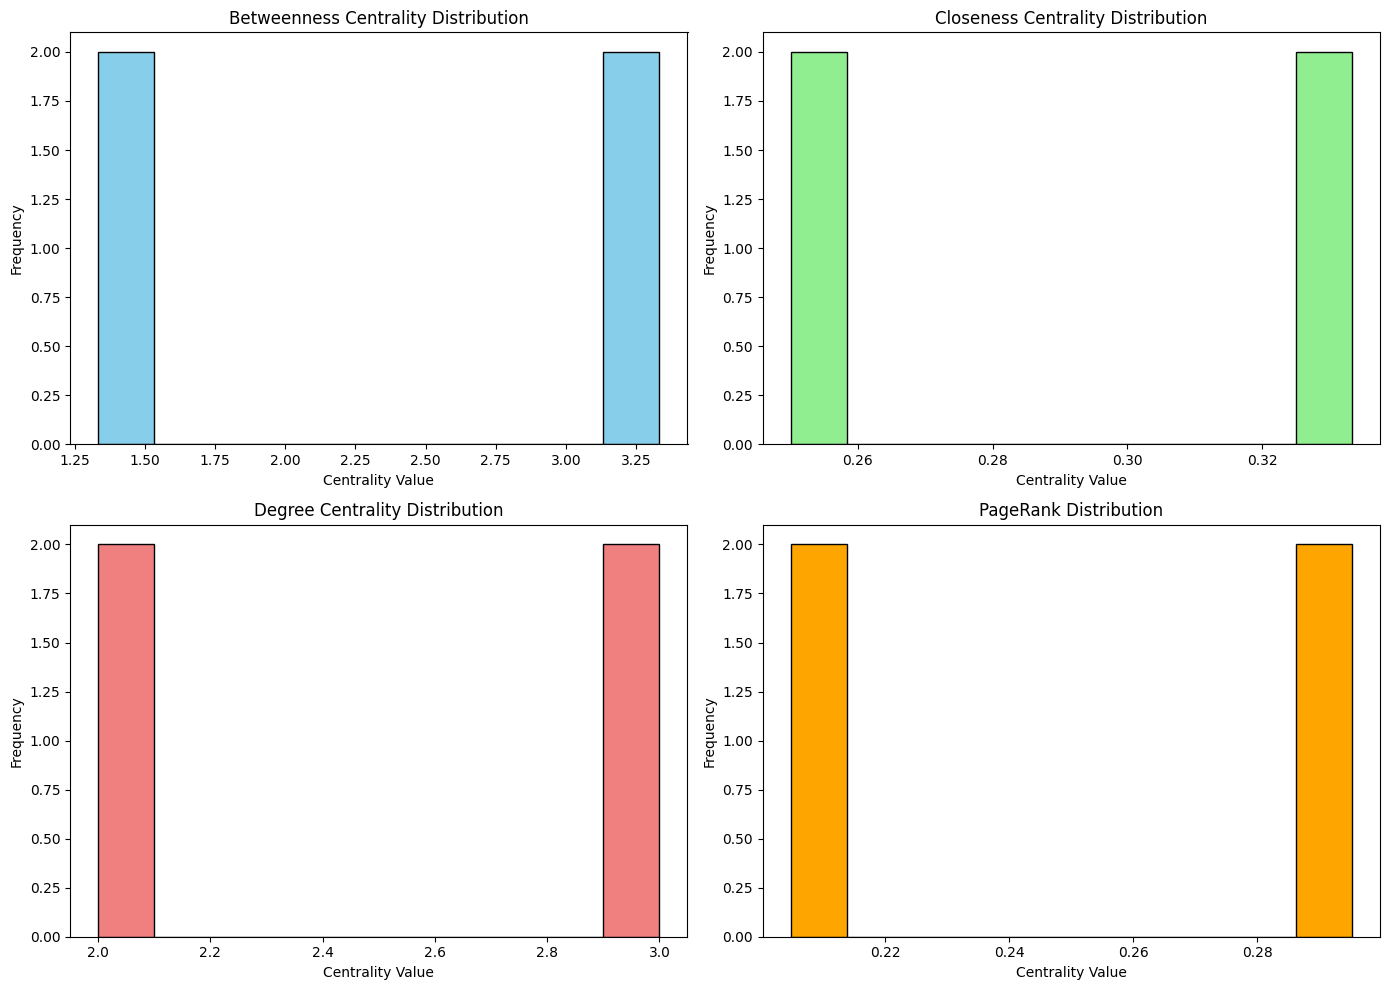

Top 5 Betweenness:
  JFK: 3.3333
  ORD: 3.3333
  LAX: 1.3333
  ATL: 1.3333

Top 5 Closeness:
  JFK: 0.3333
  ORD: 0.3333
  LAX: 0.2500
  ATL: 0.2500

Top 5 Degree:
  JFK: 3.0000
  ORD: 3.0000
  LAX: 2.0000
  ATL: 2.0000

Top 5 PageRank:
  JFK: 0.2952
  ORD: 0.2952
  LAX: 0.2048
  ATL: 0.2048



In [41]:
import matplotlib.pyplot as plt
import heapq

# Function to compute centralities for all nodes and compare them
def compare_centralities(flight_network):
    """
    Compute and compare centrality values for all nodes in the graph.
    Plot histograms of the centrality distributions.
    Return the top 5 nodes for each centrality measure.
    """
    # Initialize dictionaries to store centrality values
    betweenness = {}
    closeness = {}
    degree = {}
    pagerank = {}
    
    # Compute centrality measures for each node
    for node in flight_network:
        betweenness[node] = compute_betweenness_centrality(flight_network, node)
        closeness[node] = compute_closeness_centrality(flight_network, node)
        degree[node] = compute_degree_centrality(flight_network, node)
        pagerank[node] = compute_pagerank(flight_network, node)
    
    # Sort and extract top 5 airports for each measure
    top_5_betweenness = heapq.nlargest(5, betweenness, key=betweenness.get)
    top_5_closeness = heapq.nlargest(5, closeness, key=closeness.get)
    top_5_degree = heapq.nlargest(5, degree, key=degree.get)
    top_5_pagerank = heapq.nlargest(5, pagerank, key=pagerank.get)
    
    # Plot histograms for centrality distributions
    plt.figure(figsize=(14, 10))
    
    # Betweenness Centrality
    plt.subplot(2, 2, 1)
    plt.hist(betweenness.values(), bins=10, color='skyblue', edgecolor='black')
    plt.title("Betweenness Centrality Distribution")
    plt.xlabel("Centrality Value")
    plt.ylabel("Frequency")
    
    # Closeness Centrality
    plt.subplot(2, 2, 2)
    plt.hist(closeness.values(), bins=10, color='lightgreen', edgecolor='black')
    plt.title("Closeness Centrality Distribution")
    plt.xlabel("Centrality Value")
    plt.ylabel("Frequency")
    
    # Degree Centrality
    plt.subplot(2, 2, 3)
    plt.hist(degree.values(), bins=10, color='lightcoral', edgecolor='black')
    plt.title("Degree Centrality Distribution")
    plt.xlabel("Centrality Value")
    plt.ylabel("Frequency")
    
    # PageRank
    plt.subplot(2, 2, 4)
    plt.hist(pagerank.values(), bins=10, color='orange', edgecolor='black')
    plt.title("PageRank Distribution")
    plt.xlabel("Centrality Value")
    plt.ylabel("Frequency")
    
    plt.tight_layout()
    plt.show()
    
    # Return the top 5 nodes for each centrality measure
    results = {
        "Top 5 Betweenness": [(node, betweenness[node]) for node in top_5_betweenness],
        "Top 5 Closeness": [(node, closeness[node]) for node in top_5_closeness],
        "Top 5 Degree": [(node, degree[node]) for node in top_5_degree],
        "Top 5 PageRank": [(node, pagerank[node]) for node in top_5_pagerank],
    }
    
    return results

# Example flight network
flight_network = {
    'JFK': ['LAX', 'ORD', 'ATL'],
    'LAX': ['JFK', 'ORD'],
    'ORD': ['JFK', 'LAX', 'ATL'],
    'ATL': ['JFK', 'ORD']
}

# Call the function and display results
results = compare_centralities(flight_network)

# Print top 5 nodes for each centrality measure
for centrality, top_nodes in results.items():
    print(f"{centrality}:")
    for node, value in top_nodes:
        print(f"  {node}: {value:.4f}")
    print()

# I thing should be the best one : 

Creating flight network graph...
Graph created with 727 nodes and 36719 edges.
Computing centrality measures...


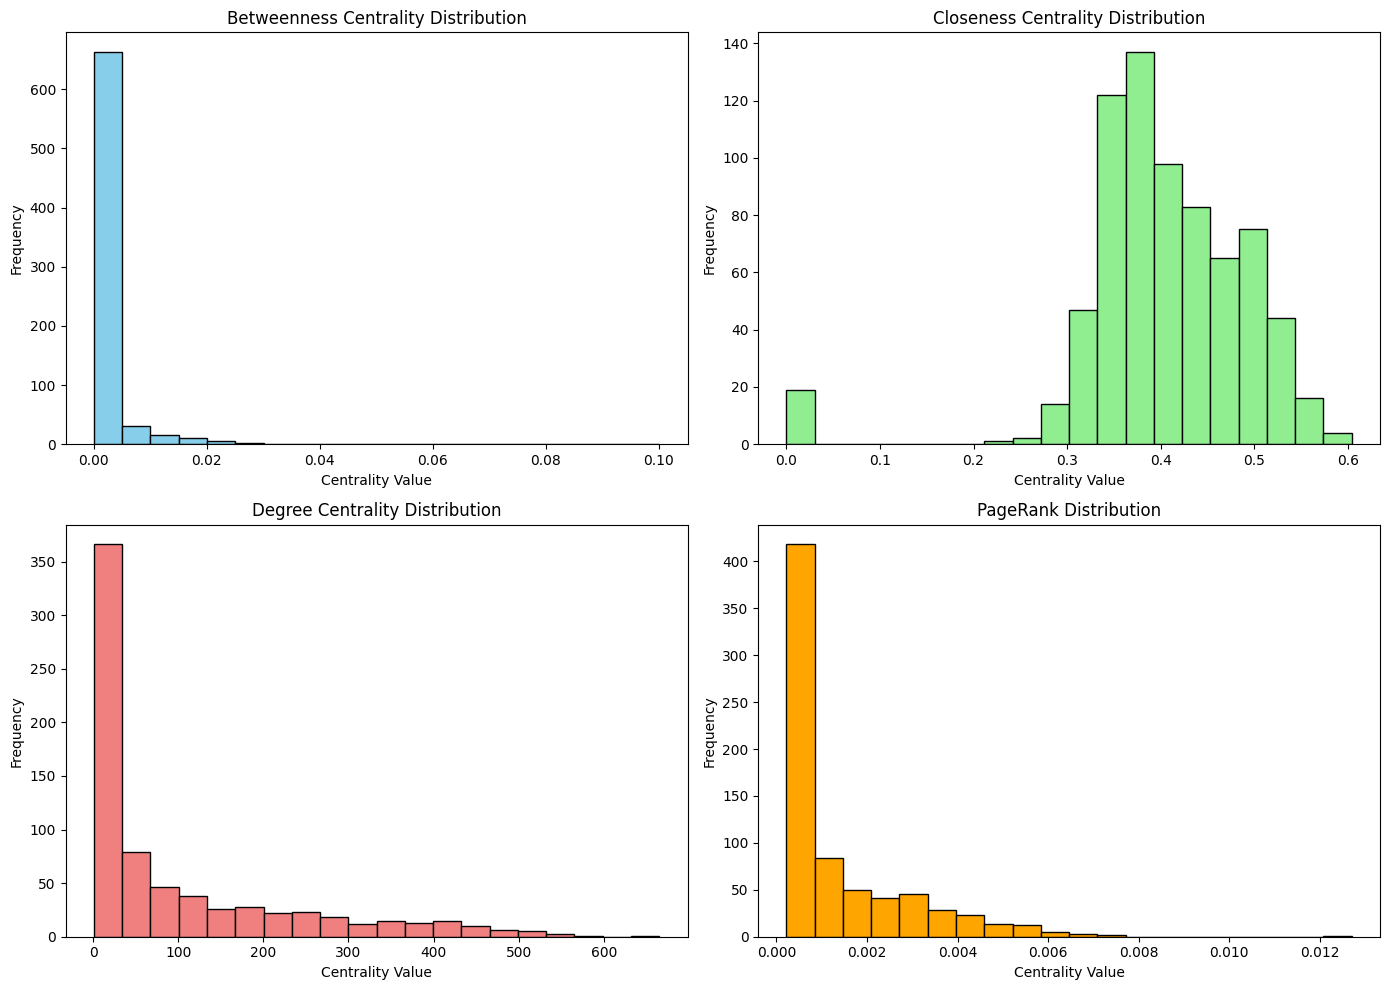

Top 5 Betweenness:
  YIP: 0.1001
  MSP: 0.0277
  MEM: 0.0268
  MCI: 0.0241
  SHV: 0.0222

Top 5 Closeness:
  YIP: 0.6043
  MSP: 0.5871
  MEM: 0.5776
  MCI: 0.5755
  STL: 0.5688

Top 5 Degree:
  YIP: 665.0000
  MSP: 583.0000
  MEM: 564.0000
  MCI: 539.0000
  ATL: 539.0000

Top 5 PageRank:
  YIP: 0.0127
  SHV: 0.0076
  MSP: 0.0076
  MEM: 0.0070
  MCI: 0.0070



In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import heapq

# Function 1: Create the flight network graph from DataFrame
def create_flight_graph(df):
    """
    Create a directed graph (DiGraph) from a DataFrame.
    Columns: 'Origin_airport', 'Destination_airport'
    """
    print("Creating flight network graph...")
    graph = nx.DiGraph()
    for _, row in df.iterrows():
        graph.add_edge(row['Origin_airport'], row['Destination_airport'])
    
    print(f"Graph created with {graph.number_of_nodes()} nodes and {graph.number_of_edges()} edges.")
    return graph

# Function 2: Compute Betweenness Centrality
def compute_betweenness(graph):
    """
    Compute Betweenness Centrality for all nodes.
    """
    return nx.betweenness_centrality(graph)

# Function 3: Compute Closeness Centrality
def compute_closeness(graph):
    """
    Compute Closeness Centrality for all nodes.
    """
    return nx.closeness_centrality(graph)

# Function 4: Compute Degree Centrality
def compute_degree(graph):
    """
    Compute Degree Centrality for all nodes.
    """
    return dict(graph.degree())

# Function 5: Compute PageRank Centrality
def compute_pagerank(graph):
    """
    Compute PageRank Centrality for all nodes.
    """
    return nx.pagerank(graph)

# Function 6: Compare Centralities and Plot
def compare_centralities(graph):
    """
    Compute and compare centrality values for all nodes in the graph.
    Plot histograms of the centrality distributions.
    Return the top 5 nodes for each centrality measure.
    """
    print("Computing centrality measures...")

    # Centrality Measures
    betweenness = compute_betweenness(graph)
    closeness = compute_closeness(graph)
    degree = compute_degree(graph)
    pagerank = compute_pagerank(graph)

    # Extract top 5 nodes for each measure
    top_5_betweenness = heapq.nlargest(5, betweenness, key=betweenness.get)
    top_5_closeness = heapq.nlargest(5, closeness, key=closeness.get)
    top_5_degree = heapq.nlargest(5, degree, key=degree.get)
    top_5_pagerank = heapq.nlargest(5, pagerank, key=pagerank.get)

    # Plot histograms for each measure
    plt.figure(figsize=(14, 10))

    plt.subplot(2, 2, 1)
    plt.hist(betweenness.values(), bins=20, color='skyblue', edgecolor='black')
    plt.title("Betweenness Centrality Distribution")
    plt.xlabel("Centrality Value")
    plt.ylabel("Frequency")

    plt.subplot(2, 2, 2)
    plt.hist(closeness.values(), bins=20, color='lightgreen', edgecolor='black')
    plt.title("Closeness Centrality Distribution")
    plt.xlabel("Centrality Value")
    plt.ylabel("Frequency")

    plt.subplot(2, 2, 3)
    plt.hist(degree.values(), bins=20, color='lightcoral', edgecolor='black')
    plt.title("Degree Centrality Distribution")
    plt.xlabel("Centrality Value")
    plt.ylabel("Frequency")

    plt.subplot(2, 2, 4)
    plt.hist(pagerank.values(), bins=20, color='orange', edgecolor='black')
    plt.title("PageRank Distribution")
    plt.xlabel("Centrality Value")
    plt.ylabel("Frequency")

    plt.tight_layout()
    plt.show()

    # Print top 5 nodes for each measure
    results = {
        "Top 5 Betweenness": [(node, betweenness[node]) for node in top_5_betweenness],
        "Top 5 Closeness": [(node, closeness[node]) for node in top_5_closeness],
        "Top 5 Degree": [(node, degree[node]) for node in top_5_degree],
        "Top 5 PageRank": [(node, pagerank[node]) for node in top_5_pagerank],
    }

    for centrality, top_nodes in results.items():
        print(f"{centrality}:")
        for node, value in top_nodes:
            print(f"  {node}: {value:.4f}")
        print()

    return results

# Main execution
if __name__ == "__main__":
    # Load the dataset
    df = df # Replace with correct path
    df = df.drop_duplicates()  # Clean duplicates

    # Step 1: Create flight graph
    flight_graph = create_flight_graph(df)

    # Step 2: Compute centralities and plot results
    centrality_results = compare_centralities(flight_graph)

## here's chatgpt's one 

In [27]:
import seaborn as sns

In [31]:
import networkx as nx

def compute_eigenvector_centrality_safe(graph):
    """
    Compute Eigenvector Centrality safely for disconnected graphs.
    Handles each connected component separately and avoids small components.
    """
    eigenvector_centrality = {}

    # Ensure undirected graph for connected components
    undirected_graph = graph.to_undirected()

    for component in nx.connected_components(undirected_graph):
        subgraph = graph.subgraph(component)  # Get subgraph for each connected component
        
        # Avoid subgraphs with fewer than 3 nodes (Eigenvector Centrality not meaningful)
        if len(subgraph) < 3:
            # Assign a default value (e.g., 0.0) for all nodes in small components
            for node in subgraph.nodes():
                eigenvector_centrality[node] = 0.0
            continue
        
        try:
            # Compute Eigenvector Centrality only for meaningful subgraphs
            centrality = nx.eigenvector_centrality_numpy(subgraph)
            eigenvector_centrality.update(centrality)
        except nx.NetworkXError as e:
            print(f"Error computing eigenvector centrality for a component: {e}")

    return eigenvector_centrality

In [32]:
def compare_centralities(graph):
    """
    Compute and compare centrality values for all nodes in the graph.
    Plot histograms and return the top 5 nodes for each measure.
    """
    print("Computing centrality measures...")

    # Centrality Measures
    betweenness = nx.betweenness_centrality(graph)
    closeness = nx.closeness_centrality(graph)
    degree = dict(graph.degree())
    pagerank = nx.pagerank(graph)
    eigenvector = compute_eigenvector_centrality_safe(graph)

    # Extract top 5 nodes for each measure
    top_5_betweenness = heapq.nlargest(5, betweenness, key=betweenness.get)
    top_5_closeness = heapq.nlargest(5, closeness, key=closeness.get)
    top_5_degree = heapq.nlargest(5, degree, key=degree.get)
    top_5_pagerank = heapq.nlargest(5, pagerank, key=pagerank.get)
    top_5_eigenvector = heapq.nlargest(5, eigenvector, key=eigenvector.get)

    # Combine results into DataFrame
    results_df = pd.DataFrame({
        "Node": list(graph.nodes()),
        "Betweenness": [betweenness.get(node, 0) for node in graph.nodes()],
        "Closeness": [closeness.get(node, 0) for node in graph.nodes()],
        "Degree": [degree.get(node, 0) for node in graph.nodes()],
        "PageRank": [pagerank.get(node, 0) for node in graph.nodes()],
        "Eigenvector": [eigenvector.get(node, 0) for node in graph.nodes()],
    })

    # Plot Eigenvector Centrality Distribution
    plt.figure(figsize=(12, 6))
    sns.histplot(results_df["Eigenvector"], bins=20, kde=True, color="purple")
    plt.title("Eigenvector Centrality Distribution")
    plt.xlabel("Centrality Value")
    plt.ylabel("Frequency")
    plt.show()

    print("\nTop 5 Nodes by Eigenvector Centrality:")
    for node in top_5_eigenvector:
        print(f"  {node}: {eigenvector[node]:.4f}")

    return results_df

In [33]:
if __name__ == "__main__":
    flight_graph = create_flight_graph(df)
    centrality_results = compare_centralities(flight_graph)

Creating flight network graph...
Graph created with 727 nodes and 36719 edges.
Computing centrality measures...


AmbiguousSolution: `eigenvector_centrality_numpy` does not give consistent results for disconnected graphs

In [36]:
def compute_katz_centrality(graph, alpha=0.1, beta=1.0, max_iter=5000, tol=1e-4):
    """
    Compute Katz Centrality for all nodes in the graph.
    Katz Centrality considers all paths with a damping factor (alpha).
    """
    try:
        return nx.katz_centrality(graph, alpha=alpha, beta=beta, max_iter=max_iter, tol=tol)
    except nx.NetworkXError as e:
        print(f"Error computing Katz Centrality: {e}")
        return {}

In [37]:
def compute_katz_centrality_safe(graph, alpha=0.1, beta=1.0, max_iter=5000, tol=1e-4):
    """
    Compute Katz Centrality for each connected component in the graph.
    """
    katz_centrality = {}
    for component in nx.weakly_connected_components(graph):  # For directed graphs
        subgraph = graph.subgraph(component)
        try:
            centrality = nx.katz_centrality(subgraph, alpha=alpha, beta=beta, max_iter=max_iter, tol=tol)
            katz_centrality.update(centrality)
        except nx.PowerIterationFailedConvergence:
            print(f"Power iteration failed for component with nodes: {list(subgraph.nodes)}")
    return katz_centrality

In [38]:
def compare_centralities(graph):
    """
    Compute and compare centrality values for all nodes in the graph.
    Plot histograms and return the top 5 nodes for each measure.
    """
    print("Computing centrality measures...")

    # Centrality Measures
    betweenness = nx.betweenness_centrality(graph)
    closeness = nx.closeness_centrality(graph)
    degree = dict(graph.degree())
    pagerank = nx.pagerank(graph)
    katz = compute_katz_centrality_safe(graph)

    # Extract top 5 nodes for each measure
    top_5_betweenness = heapq.nlargest(5, betweenness, key=betweenness.get)
    top_5_closeness = heapq.nlargest(5, closeness, key=closeness.get)
    top_5_degree = heapq.nlargest(5, degree, key=degree.get)
    top_5_pagerank = heapq.nlargest(5, pagerank, key=pagerank.get)
    top_5_katz = heapq.nlargest(5, katz, key=katz.get)

    # Combine results into DataFrame for easier comparison
    results_df = pd.DataFrame({
        "Node": list(graph.nodes()),
        "Betweenness": list(betweenness.values()),
        "Closeness": list(closeness.values()),
        "Degree": list(degree.values()),
        "PageRank": list(pagerank.values()),
        "Katz": [katz.get(node, 0) for node in graph.nodes()],
    })

    # Print top nodes for each measure
    print("\nTop 5 Nodes by Katz Centrality:")
    for node in top_5_katz:
        print(f"  {node}: {katz[node]:.4f}")

    # Plot distributions using Seaborn
    plt.figure(figsize=(12, 10))
    plt.subplot(2, 2, 1)
    sns.histplot(results_df["Betweenness"], bins=20, kde=True, color="blue")
    plt.title("Betweenness Centrality Distribution")
    
    plt.subplot(2, 2, 2)
    sns.histplot(results_df["Closeness"], bins=20, kde=True, color="green")
    plt.title("Closeness Centrality Distribution")
    
    plt.subplot(2, 2, 3)
    sns.histplot(results_df["Degree"], bins=20, kde=True, color="red")
    plt.title("Degree Centrality Distribution")
    
    plt.subplot(2, 2, 4)
    sns.histplot(results_df["Katz"], bins=20, kde=True, color="purple")
    plt.title("Katz Centrality Distribution")
    
    plt.tight_layout()
    plt.show()

    return results_df

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_centrality_distributions(centrality_dicts, graph):
    """
    Plot histograms of centrality measures using Seaborn.
    
    Parameters:
        - centrality_dicts (dict): A dictionary of centrality measures as {name: centrality_dict}.
        - graph (networkx.Graph): The graph to extract nodes.
    """
    # Combine all centrality values into a DataFrame
    centrality_df = pd.DataFrame({"Node": list(graph.nodes())})
    for name, centrality in centrality_dicts.items():
        centrality_df[name] = [centrality.get(node, 0) for node in graph.nodes()]

    # Plot distributions for each centrality measure
    plt.figure(figsize=(15, 10))
    for i, (name, _) in enumerate(centrality_dicts.items()):
        plt.subplot(2, 2, i + 1)
        sns.histplot(centrality_df[name], bins=20, kde=True, color="skyblue")
        plt.title(f"{name} Centrality Distribution")
        plt.xlabel("Centrality Value")
        plt.ylabel("Frequency")

    plt.tight_layout()
    plt.show()

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import math

def plot_centrality_distributions(centrality_dicts, graph):
    """
    Plot histograms of centrality measures using Seaborn.

    Parameters:
        - centrality_dicts (dict): A dictionary of centrality measures as {name: centrality_dict}.
        - graph (networkx.Graph): The graph to extract nodes.
    """
    # Combine all centrality values into a DataFrame
    centrality_df = pd.DataFrame({"Node": list(graph.nodes())})
    for name, centrality in centrality_dicts.items():
        centrality_df[name] = [centrality.get(node, 0) for node in graph.nodes()]

    # Determine the grid size for subplots
    num_measures = len(centrality_dicts)
    num_rows = math.ceil(num_measures / 2)  # Adjust rows dynamically
    num_cols = 2 if num_measures > 1 else 1  # Max 2 columns unless only 1 measure

    # Create subplots dynamically
    plt.figure(figsize=(12, 6 * num_rows))  # Adjust figure size based on rows
    for i, (name, _) in enumerate(centrality_dicts.items(), start=1):
        plt.subplot(num_rows, num_cols, i)
        sns.histplot(centrality_df[name], bins=20, kde=True, color="skyblue")
        plt.title(f"{name} Centrality Distribution")
        plt.xlabel("Centrality Value")
        plt.ylabel("Frequency")

    plt.tight_layout()
    plt.show()



In [39]:
import networkx as nx

# Step 1: Compute centralities
def compute_all_centralities(graph):
    betweenness = nx.betweenness_centrality(graph)
    closeness = nx.closeness_centrality(graph)
    degree = dict(graph.degree())
    pagerank = nx.pagerank(graph)
    katz = nx.katz_centrality(graph, alpha=0.1, beta=1.0, max_iter=5000, tol=1e-4)
    
    return {
        "Betweenness": betweenness,
        "Closeness": closeness,
        "Degree": degree,
        "PageRank": pagerank,
        "Katz": katz
    }

# Example graph creation
G = nx.erdos_renyi_graph(100, 0.05)  # Generate a random graph for demonstration

# Step 2: Compute centralities
centrality_measures = compute_all_centralities(G)

# Step 3: Plot distributions
plot_centrality_distributions(centrality_measures, G)

TypeError: plot_centrality_distributions() takes 1 positional argument but 2 were given

In [37]:
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Create flight network graph
def create_flight_graph(df):
    """
    Create a directed graph from the flight data.
    :param df: DataFrame with 'Origin_airport' and 'Destination_airport' columns.
    :return: NetworkX DiGraph object.
    """
    print("Creating flight network graph...")
    flight_graph = nx.DiGraph()
    for _, row in df.iterrows():
        flight_graph.add_edge(row['Origin_airport'], row['Destination_airport'])
    print(f"Graph created with {flight_graph.number_of_nodes()} nodes and {flight_graph.number_of_edges()} edges.")
    return flight_graph

# Step 2: Compute centralities
def compute_all_centralities(graph):
    """
    Compute various centrality measures.
    :param graph: NetworkX graph
    :return: Dictionary of centrality measures
    """
    print("Computing centralities...")
    centralities = {
        "Betweenness": nx.betweenness_centrality(graph),
        "Closeness": nx.closeness_centrality(graph),
        "Degree": dict(graph.degree()),  # Degree centrality
        "PageRank": nx.pagerank(graph),
        "Katz": nx.katz_centrality(graph, alpha=0.1, beta=1.0, max_iter=1000, tol=1e-4)
    }
    print("Centralities computed.")
    return centralities

# Step 3: Plot centrality distributions
def plot_centrality_distributions(centralities):
    """
    Plot histograms of the centrality measures using Seaborn.
    :param centralities: Dictionary containing centrality measures.
    """
    print("Plotting centrality distributions...")
    plt.figure(figsize=(12, 10))
    num_measures = len(centralities)
    num_rows = (num_measures + 1) // 2  # Two columns layout

    for i, (measure_name, centrality) in enumerate(centralities.items(), start=1):
        plt.subplot(num_rows, 2, i)
        sns.histplot(list(centrality.values()), bins=20, kde=True, color='skyblue')
        plt.title(f"{measure_name} Centrality")
        plt.xlabel("Centrality Value")
        plt.ylabel("Frequency")

    plt.tight_layout()
    plt.show()
    print("Plots displayed.")

# Step 4: Main execution flow
if __name__ == "__main__":
    # Example flight data
    file_path = df  # Replace with your actual path
    df = pd.read_csv(file_path)  # Ensure it has 'Origin_airport' and 'Destination_airport'

    # Step 1: Create flight network graph
    flight_graph = create_flight_graph(df)

    # Step 2: Compute centralities
    centrality_measures = compute_all_centralities(flight_graph)

    # Step 3: Plot centrality distributions
    plot_centrality_distributions(centrality_measures)

TypeError: argument of type 'method' is not iterable

In [40]:
def analyze_centrality(flight_network, airport):
    """
    Computes centrality measures for a specific airport.
    :param flight_network: NetworkX DiGraph
    :param airport: Airport node name
    :return: Dictionary with centrality measures
    """
    centrality_measures = {
        "Betweenness Centrality": nx.betweenness_centrality(flight_network).get(airport, 0),
        "Closeness Centrality": nx.closeness_centrality(flight_network).get(airport, 0),
        "Degree Centrality": flight_network.degree(airport),
        "PageRank": nx.pagerank(flight_network).get(airport, 0),
    }
    return centrality_measures

# Example Usage
airport = 'FVS'
centrality = analyze_centrality(flight_network, airport)
print(f"Centrality Measures for {airport}: {centrality}")

AttributeError: 'dict' object has no attribute 'is_directed'

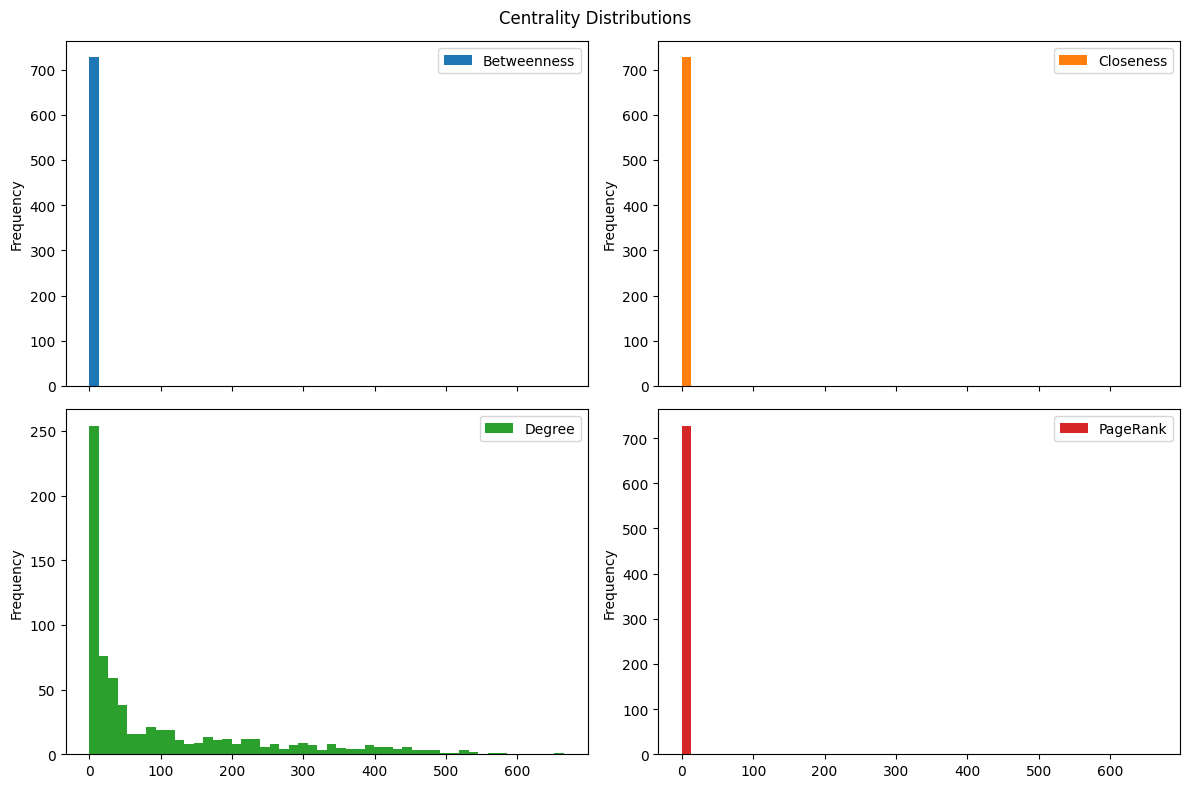


Top 5 nodes by Betweenness Centrality:
    Node  Betweenness
196  YIP     0.100109
104  MSP     0.027676
131  MEM     0.026827
100  MCI     0.024124
99   SHV     0.022159

Top 5 nodes by Closeness Centrality:
    Node  Closeness
196  YIP   0.604342
104  MSP   0.587122
131  MEM   0.577567
100  MCI   0.575486
128  STL   0.568824

Top 5 nodes by Degree Centrality:
    Node  Degree
196  YIP     665
104  MSP     583
131  MEM     564
100  MCI     539
183  ATL     539

Top 5 nodes by PageRank Centrality:
    Node  PageRank
196  YIP  0.012708
99   SHV  0.007642
104  MSP  0.007559
131  MEM  0.007049
100  MCI  0.007032


In [49]:
def compare_centralities(flight_network):
    """
    Compute and compare centrality values for all nodes in the graph.
    :param flight_network: NetworkX DiGraph
    :return: Top 5 nodes for each centrality measure
    """
    # Compute centralities
    betweenness = nx.betweenness_centrality(flight_network)
    closeness = nx.closeness_centrality(flight_network)
    degree = dict(flight_network.degree())
    pagerank = nx.pagerank(flight_network)

    # Create a DataFrame
    df_centralities = pd.DataFrame({
        "Node": list(flight_network.nodes),
        "Betweenness": [betweenness[node] for node in flight_network.nodes],
        "Closeness": [closeness[node] for node in flight_network.nodes],
        "Degree": [degree[node] for node in flight_network.nodes],
        "PageRank": [pagerank[node] for node in flight_network.nodes]
    })

    # Plot centrality distributions
    df_centralities.plot(kind='hist', bins=50, subplots=True, layout=(2, 2), figsize=(12, 8), title="Centrality Distributions")
    plt.tight_layout()
    plt.show()

    # Print Top 5 for each measure
    top_5 = {}
    for measure in ["Betweenness", "Closeness", "Degree", "PageRank"]:
        top_5[measure] = df_centralities.nlargest(5, measure)[["Node", measure]]
        print(f"\nTop 5 nodes by {measure} Centrality:")
        print(top_5[measure])

    return top_5

# Example Usage
top_centralities = compare_centralities(flight_network)

In [50]:
def eigenvector_centrality(flight_network):
    """
    Computes Eigenvector Centrality for all nodes.
    :param flight_network: NetworkX DiGraph
    :return: Dictionary of nodes and their eigenvector centralities
    """
    return nx.eigenvector_centrality_numpy(flight_network)

# Compare with other centralities
eigen_centrality = eigenvector_centrality(flight_network)
print("Top 5 Airports by Eigenvector Centrality:")
print(sorted(eigen_centrality.items(), key=lambda x: x[1], reverse=True)[:5])

AmbiguousSolution: `eigenvector_centrality_numpy` does not give consistent results for disconnected graphs

In [70]:
# centrality_functions.py

def create_adjacency_list(dataframe):
    """
    Creates an adjacency list representation of the flight network graph.

    Args:
        dataframe (pd.DataFrame): DataFrame with 'Origin_airport' and 'Destination_airport' columns.

    Returns:
        dict: Adjacency list representation of the flight network.
    """
    adjacency_list = {}
    for _, row in dataframe.iterrows():
        origin, destination = row['Origin_airport'], row['Destination_airport']
        if origin not in adjacency_list:
            adjacency_list[origin] = []
        adjacency_list[origin].append(destination)
    return adjacency_list


def compute_degree_centrality(adjacency_list):
    """
    Computes degree centrality for each node in the graph.

    Args:
        adjacency_list (dict): Adjacency list of the graph.

    Returns:
        dict: Degree centrality for each node.
    """
    centrality = {}
    for node in adjacency_list:
        centrality[node] = len(adjacency_list[node])  # Out-degree
    return centrality


def compute_closeness_centrality(adjacency_list):
    """
    Computes closeness centrality for each node.

    Args:
        adjacency_list (dict): Adjacency list of the graph.

    Returns:
        dict: Closeness centrality for each node.
    """
    def bfs_shortest_paths(node):
        distances = {node: 0}
        queue = [node]
        while queue:
            current = queue.pop(0)
            for neighbor in adjacency_list.get(current, []):
                if neighbor not in distances:
                    distances[neighbor] = distances[current] + 1
                    queue.append(neighbor)
        return distances

    closeness = {}
    total_nodes = len(adjacency_list)
    for node in adjacency_list:
        shortest_paths = bfs_shortest_paths(node)
        if len(shortest_paths) > 1:  # Avoid division by zero
            closeness[node] = (len(shortest_paths) - 1) / sum(shortest_paths.values())
        else:
            closeness[node] = 0
    return closeness


def compute_betweenness_centrality(adjacency_list):
    """
    Computes betweenness centrality for each node.

    Args:
        adjacency_list (dict): Adjacency list of the graph.

    Returns:
        dict: Betweenness centrality for each node.
    """
    betweenness = {node: 0 for node in adjacency_list}

    def bfs_paths_count(source):
        queue = [source]
        paths = {node: 0 for node in adjacency_list}
        paths[source] = 1
        distances = {node: float('inf') for node in adjacency_list}
        distances[source] = 0

        while queue:
            current = queue.pop(0)
            for neighbor in adjacency_list.get(current, []):
                if distances[neighbor] == float('inf'):  # First time visiting this node
                    distances[neighbor] = distances[current] + 1
                    queue.append(neighbor)
                if distances[neighbor] == distances[current] + 1:
                    paths[neighbor] += paths[current]

        return distances, paths

    for source in adjacency_list:
        distances, paths = bfs_paths_count(source)
        dependency = {node: 0 for node in adjacency_list}
        nodes = list(adjacency_list.keys())
        for node in reversed(nodes):  # Process in reverse order
            for neighbor in adjacency_list.get(node, []):
                if distances[neighbor] == distances[node] + 1 and paths[neighbor] > 0:
                    dependency[node] += (paths[node] / paths[neighbor]) * (1 + dependency[neighbor])
            if node != source:
                betweenness[node] += dependency[node]

    # Normalize the betweenness centrality
    normalization_factor = 1 / ((len(adjacency_list) - 1) * (len(adjacency_list) - 2))
    for node in betweenness:
        betweenness[node] *= normalization_factor

    return betweenness


def compute_pagerank(adjacency_list, alpha=0.85, max_iter=100, tol=1e-6):
    """
    Computes PageRank for each node.

    Args:
        adjacency_list (dict): Adjacency list of the graph.
        alpha (float): Damping factor for PageRank.
        max_iter (int): Maximum number of iterations.
        tol (float): Convergence tolerance.

    Returns:
        dict: PageRank for each node.
    """
    nodes = list(adjacency_list.keys())
    N = len(nodes)
    rank = {node: 1 / N for node in nodes}
    for _ in range(max_iter):
        new_rank = {}
        for node in nodes:
            new_rank[node] = (1 - alpha) / N
            for neighbor in adjacency_list:
                if node in adjacency_list[neighbor]:  # Incoming link
                    new_rank[node] += alpha * rank[neighbor] / len(adjacency_list[neighbor])
        # Check for convergence
        if all(abs(new_rank[node] - rank[node]) < tol for node in nodes):
            break
        rank = new_rank
    return rank

In [71]:
# plot_centrality.ipynb

import pandas as pd
import matplotlib.pyplot as plt
#from centrality_functions import (
 #   create_adjacency_list,
  #  compute_degree_centrality,
   # compute_closeness_centrality,
    #compute_betweenness_centrality,
    #compute_pagerank,
#)

df = df

# Step 1: Create adjacency list
adjacency_list = create_adjacency_list(df)

# Step 2: Compute centrality measures
degree_centrality = compute_degree_centrality(adjacency_list)
closeness_centrality = compute_closeness_centrality(adjacency_list)
betweenness_centrality = compute_betweenness_centrality(adjacency_list)
pagerank = compute_pagerank(adjacency_list)

# Step 3: Plot centrality measures
plt.figure(figsize=(15, 10))

# Degree Centrality
plt.subplot(2, 2, 1)
plt.bar(degree_centrality.keys(), degree_centrality.values())
plt.title("Degree Centrality")
plt.xlabel("Airports")
plt.ylabel("Centrality")

# Closeness Centrality
plt.subplot(2, 2, 2)
plt.bar(closeness_centrality.keys(), closeness_centrality.values())
plt.title("Closeness Centrality")
plt.xlabel("Airports")
plt.ylabel("Centrality")

# Betweenness Centrality
plt.subplot(2, 2, 3)
plt.bar(betweenness_centrality.keys(), betweenness_centrality.values())
plt.title("Betweenness Centrality")
plt.xlabel("Airports")
plt.ylabel("Centrality")

# PageRank
plt.subplot(2, 2, 4)
plt.bar(pagerank.keys(), pagerank.values())
plt.title("PageRank")
plt.xlabel("Airports")
plt.ylabel("Centrality")

plt.tight_layout()
plt.show()

KeyError: 'JFK'

In [68]:
def convert_digraph_to_adjacency_list(digraph):
    """
    Converts a networkx.DiGraph to an adjacency list dictionary.

    Args:
        digraph (networkx.DiGraph): Directed graph.

    Returns:
        dict: Adjacency list representation of the graph.
    """
    adjacency_list = {node: list(neighbors) for node, neighbors in digraph.adjacency()}
    return adjacency_list

In [69]:
# Convert DiGraph to adjacency list
adjacency_list = convert_digraph_to_adjacency_list(flight_network)

# Compute centrality measures using the adjacency list
degree_centrality = compute_degree_centrality(adjacency_list)
closeness_centrality = compute_closeness_centrality(adjacency_list)
betweenness_centrality = compute_betweenness_centrality(adjacency_list)
pagerank = compute_pagerank(adjacency_list)

ZeroDivisionError: division by zero

In [72]:
def compute_degree_centrality(flight_network):
    """
    Computes degree centrality for each airport in the flight network.

    Args:
        flight_network (dict): Adjacency list of the flight network.

    Returns:
        dict: Degree centrality for each airport.
    """
    centrality = {}
    for airport in flight_network:
        centrality[airport] = len(flight_network[airport])  # Out-degree
    return centrality

In [73]:
def compute_closeness_centrality(flight_network):
    """
    Computes closeness centrality for each airport.

    Args:
        flight_network (dict): Adjacency list of the flight network.

    Returns:
        dict: Closeness centrality for each airport.
    """
    def bfs_shortest_paths(node):
        distances = {node: 0}
        queue = [node]
        while queue:
            current = queue.pop(0)
            for neighbor in flight_network.get(current, []):
                if neighbor not in distances:
                    distances[neighbor] = distances[current] + 1
                    queue.append(neighbor)
        return distances

    closeness = {}
    for airport in flight_network:
        shortest_paths = bfs_shortest_paths(airport)
        if len(shortest_paths) > 1:
            closeness[airport] = (len(shortest_paths) - 1) / sum(shortest_paths.values())
        else:
            closeness[airport] = 0
    return closeness

In [74]:
def compute_betweenness_centrality(adjacency_list):
    """
    Computes betweenness centrality for each node.

    Args:
        adjacency_list (dict): Adjacency list of the graph.

    Returns:
        dict: Betweenness centrality for each node.
    """
    betweenness = {node: 0 for node in adjacency_list}

    def bfs_paths_count(source):
        queue = [source]
        paths = {node: 0 for node in adjacency_list}
        paths[source] = 1
        distances = {node: float('inf') for node in adjacency_list}
        distances[source] = 0

        while queue:
            current = queue.pop(0)
            for neighbor in adjacency_list.get(current, []):
                if distances[neighbor] == float('inf'):  # First time visiting this node
                    distances[neighbor] = distances[current] + 1
                    queue.append(neighbor)
                if distances[neighbor] == distances[current] + 1:
                    paths[neighbor] += paths[current]

        return distances, paths

    for source in adjacency_list:
        distances, paths = bfs_paths_count(source)
        dependency = {node: 0 for node in adjacency_list}
        nodes = list(adjacency_list.keys())
        for node in reversed(nodes):  # Process in reverse order
            for neighbor in adjacency_list.get(node, []):
                if distances[neighbor] == distances[node] + 1 and paths[neighbor] > 0:
                    dependency[node] += (paths[node] / paths[neighbor]) * (1 + dependency[neighbor])
            if node != source:
                betweenness[node] += dependency[node]

    # Normalize the betweenness centrality
    normalization_factor = 1 / ((len(adjacency_list) - 1) * (len(adjacency_list) - 2))
    for node in betweenness:
        betweenness[node] *= normalization_factor

    return betweenness

In [76]:
def compute_pagerank(flight_network, alpha=0.85, max_iter=100, tol=1e-6):
    """
    Computes PageRank for each airport.

    Args:
        flight_network (dict): Adjacency list of the flight network.
        alpha (float): Damping factor for PageRank.
        max_iter (int): Maximum number of iterations.
        tol (float): Convergence tolerance.

    Returns:
        dict: PageRank for each airport.
    """
    airports = list(flight_network.keys())
    N = len(airports)
    rank = {airport: 1 / N for airport in airports}

    for _ in range(max_iter):
        new_rank = {}
        for airport in airports:
            new_rank[airport] = (1 - alpha) / N
            for neighbor in flight_network:
                if airport in flight_network[neighbor]:
                    new_rank[airport] += alpha * rank[neighbor] / len(flight_network[neighbor])
        if all(abs(new_rank[airport] - rank[airport]) < tol for airport in airports):
            break
        rank = new_rank
    return rank

In [77]:
import matplotlib.pyplot as plt
import pandas as pd


df =  df

# Step 2: Compute centrality measures
degree_centrality = compute_degree_centrality(flight_network)
closeness_centrality = compute_closeness_centrality(flight_network)
betweenness_centrality = compute_betweenness_centrality(flight_network)
pagerank = compute_pagerank(flight_network)

# Step 3: Plot the centrality measures
plt.figure(figsize=(15, 10))

# Degree Centrality
plt.subplot(2, 2, 1)
plt.bar(degree_centrality.keys(), degree_centrality.values())
plt.title("Degree Centrality")
plt.xlabel("Airports")
plt.ylabel("Centrality")

# Closeness Centrality
plt.subplot(2, 2, 2)
plt.bar(closeness_centrality.keys(), closeness_centrality.values())
plt.title("Closeness Centrality")
plt.xlabel("Airports")
plt.ylabel("Centrality")

# Betweenness Centrality
plt.subplot(2, 2, 3)
plt.bar(betweenness_centrality.keys(), betweenness_centrality.values())
plt.title("Betweenness Centrality")
plt.xlabel("Airports")
plt.ylabel("Centrality")

# PageRank
plt.subplot(2, 2, 4)
plt.bar(pagerank.keys(), pagerank.values())
plt.title("PageRank")
plt.xlabel("Airports")
plt.ylabel("Centrality")

plt.tight_layout()
plt.show()

AttributeError: 'DiGraph' object has no attribute 'get'

In [79]:
import matplotlib.pyplot as plt
import pandas as pd

# Functions to compute centrality measures
def create_flight_network(dataframe):
    """
    Creates a directed graph representation of the flight network using adjacency lists.

    Args:
        dataframe (pd.DataFrame): DataFrame with 'Origin_airport' and 'Destination_airport'.

    Returns:
        dict: Adjacency list representation of the flight network.
    """
    flight_network = {}
    for _, row in dataframe.iterrows():
        origin, destination = row['Origin_airport'], row['Destination_airport']
        if origin not in flight_network:
            flight_network[origin] = []
        flight_network[origin].append(destination)
    return flight_network

def compute_degree_centrality(flight_network):
    """Compute degree centrality (out-degree) for each airport."""
    return {airport: len(neighbors) for airport, neighbors in flight_network.items()}

def compute_closeness_centrality(flight_network):
    """Compute closeness centrality for each airport."""
    def bfs_shortest_paths(node):
        distances = {node: 0}
        queue = [node]
        while queue:
            current = queue.pop(0)
            for neighbor in flight_network.get(current, []):
                if neighbor not in distances:
                    distances[neighbor] = distances[current] + 1
                    queue.append(neighbor)
        return distances

    centrality = {}
    for node in flight_network:
        shortest_paths = bfs_shortest_paths(node)
        if len(shortest_paths) > 1:  # Avoid division by zero
            centrality[node] = (len(shortest_paths) - 1) / sum(shortest_paths.values())
        else:
            centrality[node] = 0
    return centrality

def compute_betweenness_centrality(flight_network):
    """Compute betweenness centrality for each airport."""
    betweenness = {node: 0 for node in flight_network}

    def bfs_paths_count(source):
        queue = [source]
        paths = {node: 0 for node in flight_network}
        paths[source] = 1
        distances = {node: float('inf') for node in flight_network}
        distances[source] = 0

        while queue:
            current = queue.pop(0)
            for neighbor in flight_network.get(current, []):
                if distances[neighbor] == float('inf'):  # First time visiting
                    distances[neighbor] = distances[current] + 1
                    queue.append(neighbor)
                if distances[neighbor] == distances[current] + 1:
                    paths[neighbor] += paths[current]

        return distances, paths

    for source in flight_network:
        distances, paths = bfs_paths_count(source)
        dependency = {node: 0 for node in flight_network}
        nodes = list(flight_network.keys())
        for node in reversed(nodes):  # Process in reverse order
            for neighbor in flight_network.get(node, []):
                if distances[neighbor] == distances[node] + 1 and paths[neighbor] > 0:
                    dependency[node] += (paths[node] / paths[neighbor]) * (1 + dependency[neighbor])
            if node != source:
                betweenness[node] += dependency[node]

    normalization = 1 / ((len(flight_network) - 1) * (len(flight_network) - 2))
    for node in betweenness:
        betweenness[node] *= normalization

    return betweenness

def compute_pagerank(flight_network, alpha=0.85, max_iter=100, tol=1e-6):
    """Compute PageRank for each airport."""
    airports = list(flight_network.keys())
    N = len(airports)
    rank = {airport: 1 / N for airport in airports}

    for _ in range(max_iter):
        new_rank = {}
        for airport in airports:
            new_rank[airport] = (1 - alpha) / N
            for neighbor in flight_network:
                if airport in flight_network[neighbor]:
                    new_rank[airport] += alpha * rank[neighbor] / len(flight_network[neighbor])
        if all(abs(new_rank[airport] - rank[airport]) < tol for airport in airports):
            break
        rank = new_rank
    return rank



# Step 1: Create flight network
flight_network = create_flight_network(df)

# Step 2: Compute centrality measures
degree_centrality = compute_degree_centrality(flight_network)
closeness_centrality = compute_closeness_centrality(flight_network)
betweenness_centrality = compute_betweenness_centrality(flight_network)
pagerank = compute_pagerank(flight_network)

# Step 3: Plot centrality measures
plt.figure(figsize=(15, 10))

# Degree Centrality
plt.subplot(2, 2, 1)
plt.bar(degree_centrality.keys(), degree_centrality.values())
plt.title("Degree Centrality")
plt.xlabel("Airports")
plt.ylabel("Centrality")

# Closeness Centrality
plt.subplot(2, 2, 2)
plt.bar(closeness_centrality.keys(), closeness_centrality.values())
plt.title("Closeness Centrality")
plt.xlabel("Airports")
plt.ylabel("Centrality")

# Betweenness Centrality
plt.subplot(2, 2, 3)
plt.bar(betweenness_centrality.keys(), betweenness_centrality.values())
plt.title("Betweenness Centrality")
plt.xlabel("Airports")
plt.ylabel("Centrality")

# PageRank
plt.subplot(2, 2, 4)
plt.bar(pagerank.keys(), pagerank.values())
plt.title("PageRank")
plt.xlabel("Airports")
plt.ylabel("Centrality")

plt.tight_layout()
plt.show()

KeyError: 'JFK'

In [80]:
def create_flight_network(dataframe):
    """
    Creates a directed graph representation of the flight network using adjacency lists.

    Args:
        dataframe (pd.DataFrame): DataFrame with 'Origin_airport' and 'Destination_airport'.

    Returns:
        dict: Adjacency list representation of the flight network.
    """
    flight_network = {}
    all_airports = set(dataframe['Origin_airport']).union(set(dataframe['Destination_airport']))
    for airport in all_airports:
        flight_network[airport] = []
    for _, row in dataframe.iterrows():
        origin, destination = row['Origin_airport'], row['Destination_airport']
        flight_network[origin].append(destination)
    return flight_network

In [81]:
print("Unique airports in Origin:", set(df['Origin_airport'].unique()))
print("Unique airports in Destination:", set(df['Destination_airport'].unique()))

Unique airports in Origin: {'ORD', 'ATL', 'DFW'}
Unique airports in Destination: {'ORD', 'JFK', 'ATL', 'DFW'}


In [82]:
def compute_betweenness_centrality(flight_network):
    """Compute betweenness centrality for each airport."""
    betweenness = {node: 0 for node in flight_network}

    def bfs_paths_count(source):
        queue = [source]
        paths = {node: 0 for node in flight_network}
        paths[source] = 1
        distances = {node: float('inf') for node in flight_network}
        distances[source] = 0

        while queue:
            current = queue.pop(0)
            for neighbor in flight_network.get(current, []):
                if neighbor not in distances:
                    continue  # Skip if neighbor is missing
                if distances[neighbor] == float('inf'):  # First time visiting
                    distances[neighbor] = distances[current] + 1
                    queue.append(neighbor)
                if distances[neighbor] == distances[current] + 1:
                    paths[neighbor] += paths[current]

        return distances, paths

    for source in flight_network:
        distances, paths = bfs_paths_count(source)
        dependency = {node: 0 for node in flight_network}
        nodes = list(flight_network.keys())
        for node in reversed(nodes):  # Process in reverse order
            for neighbor in flight_network.get(node, []):
                if neighbor not in distances or distances[neighbor] != distances[node] + 1:
                    continue
                dependency[node] += (paths[node] / paths[neighbor]) * (1 + dependency[neighbor])
            if node != source:
                betweenness[node] += dependency[node]

    normalization = 1 / ((len(flight_network) - 1) * (len(flight_network) - 2)) if len(flight_network) > 2 else 1
    for node in betweenness:
        betweenness[node] *= normalization

    return betweenness

In [83]:
flight_network = create_flight_network(df)
degree_centrality = compute_degree_centrality(flight_network)
closeness_centrality = compute_closeness_centrality(flight_network)
betweenness_centrality = compute_betweenness_centrality(flight_network)
pagerank = compute_pagerank(flight_network)

ZeroDivisionError: division by zero